In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Read the CSV file into a DataFrame
df_original = pd.read_csv('originaldf.csv')

df_noisy1= pd.read_csv('df-noisy1.csv')  
df_noisy2= pd.read_csv('df-noisy2.csv') 
df_noisy3= pd.read_csv('df-noisy3.csv') 
df_noisy4= pd.read_csv('df-noisy4.csv') 
df_noisy5= pd.read_csv('df-noisy5.csv') 
df_noisy6= pd.read_csv('df-noisy6.csv') 
df_noisy7= pd.read_csv('df-noisy7.csv') 
df_noisy8= pd.read_csv('df-noisy8.csv') 



# Data loss

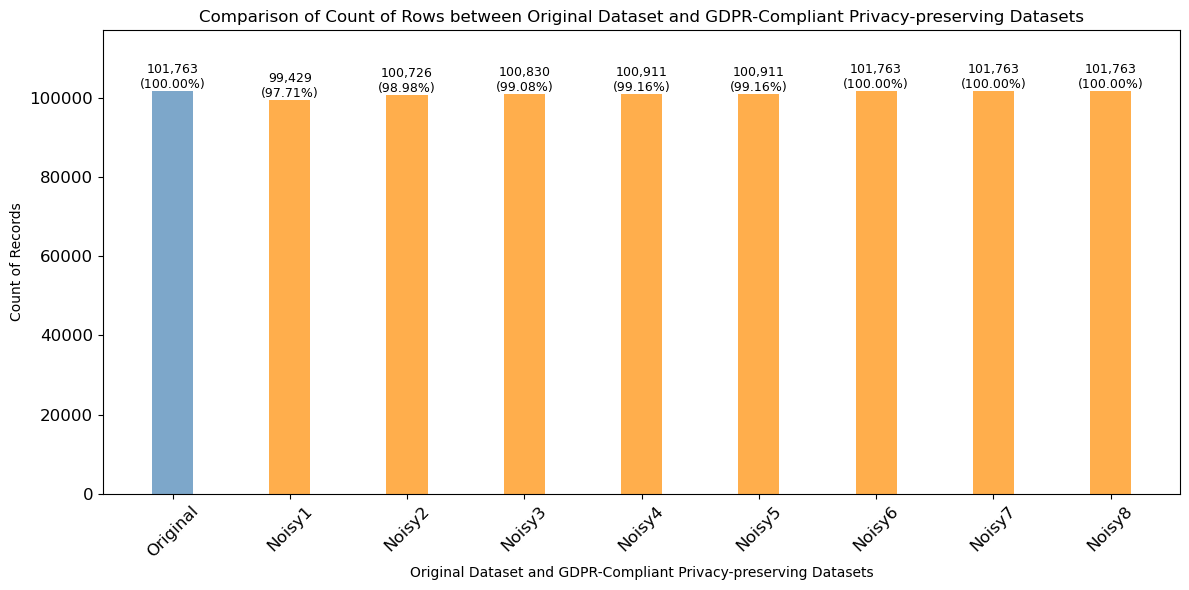

In [101]:


# Calculate number of rows in each DataFrame
rows_original = len(df_original)
rows_noisy1 = len(df_noisy1)
rows_noisy2 = len(df_noisy2)
rows_noisy3 = len(df_noisy3)
rows_noisy4 = len(df_noisy4)
rows_noisy5 = len(df_noisy5)
rows_noisy6 = len(df_noisy6)
rows_noisy7 = len(df_noisy7)
rows_noisy8 = len(df_noisy8)

# Calculate percentage of rows in each noisy dataset relative to original dataset
percentage_noisy1 = (rows_noisy1 / rows_original) * 100
percentage_noisy2 = (rows_noisy2 / rows_original) * 100
percentage_noisy3 = (rows_noisy3 / rows_original) * 100
percentage_noisy4 = (rows_noisy4 / rows_original) * 100
percentage_noisy5 = (rows_noisy5 / rows_original) * 100
percentage_noisy6 = (rows_noisy6 / rows_original) * 100
percentage_noisy7 = (rows_noisy7 / rows_original) * 100
percentage_noisy8 = (rows_noisy8 / rows_original) * 100

# Create a bar plot to compare the number of rows
labels = ['Original', 'Noisy1', 'Noisy2', 'Noisy3', 'Noisy4', 'Noisy5', 'Noisy6', 'Noisy7', 'Noisy8']
rows = [rows_original, rows_noisy1, rows_noisy2, rows_noisy3, rows_noisy4, rows_noisy5, rows_noisy6, rows_noisy7, rows_noisy8]
percentages = [100.0, percentage_noisy1, percentage_noisy2, percentage_noisy3, percentage_noisy4, percentage_noisy5, percentage_noisy6, percentage_noisy7, percentage_noisy8]

plt.figure(figsize=(12, 6))  # Adjust figure height

# Adjust width of bars here (default is 0.8)
bar_width = 0.35

# Define colors for each group of bars
original_color = 'steelblue'
noisy_color = 'darkorange'

bars_original = plt.bar(labels[0], rows[0], color=original_color, alpha=0.7, width=bar_width)
bars_noisy = plt.bar(labels[1:], rows[1:], color=noisy_color, alpha=0.7, width=bar_width)

# Add data labels on top of bars with adjusted font size
for bar, row, percent in zip(bars_original, rows[:1], [100.0]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{row:,}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=9)  # Adjust font size and positioning

for bar, row, percent in zip(bars_noisy, rows[1:], percentages[1:]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{row:,}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=9)  # Adjust font size and positioning

plt.xlabel('Original Dataset and GDPR-Compliant Privacy-preserving Datasets')
plt.ylabel('Count of Records')
plt.title('Comparison of Count of Rows between Original Dataset and GDPR-Compliant Privacy-preserving Datasets')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)  # Adjust font size of y-axis ticks

# Adjust bottom margin to fit the xlabel properly
plt.subplots_adjust(bottom=0.2)

# Adjust ylim to prevent text above bars from exceeding top boundary
plt.ylim(top=max(rows) * 1.15)  # Increase ylim by 15% of maximum row count

plt.tight_layout()

plt.savefig('datalossratio.png')
plt.show()


# distributional_measures

In [89]:
#Distributional Measures for Original Data(Numerical Columns):

numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                     'num_medications', 'number_outpatient', 'number_emergency', 
                     'number_inpatient', 'number_diagnoses']

def calculate_distributional_measures(df, columns):
    measures = {}
    for col in columns:
        measures[col] = {
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode()[0],
            'range': df[col].max() - df[col].min(),
            'variance': df[col].var(),
            'std_dev': df[col].std(),
            'iqr': df[col].quantile(0.75) - df[col].quantile(0.25),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurt(),
            'min': df[col].min(),
            'max': df[col].max()
        }
    return pd.DataFrame(measures)

# Calculate measures for the original and noisy dataframes
original_measures = calculate_distributional_measures(df_original, numerical_columns)
noisy_measures = calculate_distributional_measures(df_noisy1, numerical_columns)

# Display the results
print("Distributional Measures for Original Data:")
print(original_measures)

print("\nDistributional Measures for Noisy Data:")
print(noisy_measures)

Distributional Measures for Original Data:
          time_in_hospital  num_lab_procedures  num_procedures  \
mean              4.396018           43.095909        1.339691   
median            4.000000           44.000000        1.000000   
mode              3.000000            1.000000        0.000000   
range            13.000000          131.000000        6.000000   
variance          8.910777          387.074939        2.909726   
std_dev           2.985092           19.674220        1.705792   
iqr               4.000000           26.000000        2.000000   
skewness          1.134030           -0.236531        1.316460   
kurtosis          0.850342           -0.245042        0.857272   
min               1.000000            1.000000        0.000000   
max              14.000000          132.000000        6.000000   

          num_medications  number_outpatient  number_emergency  \
mean            16.021835           0.369368          0.197842   
median          15.000000       

Distributional Measures for Original Data:
          time_in_hospital  num_lab_procedures  num_procedures  \
mean              4.396018           43.095909        1.339691   
median            4.000000           44.000000        1.000000   
mode              3.000000            1.000000        0.000000   
range            13.000000          131.000000        6.000000   
variance          8.910777          387.074939        2.909726   
std_dev           2.985092           19.674220        1.705792   
iqr               4.000000           26.000000        2.000000   
skewness          1.134030           -0.236531        1.316460   
kurtosis          0.850342           -0.245042        0.857272   
min               1.000000            1.000000        0.000000   
max              14.000000          132.000000        6.000000   

          num_medications  number_outpatient  number_emergency  \
mean            16.021835           0.369368          0.197842   
median          15.000000       

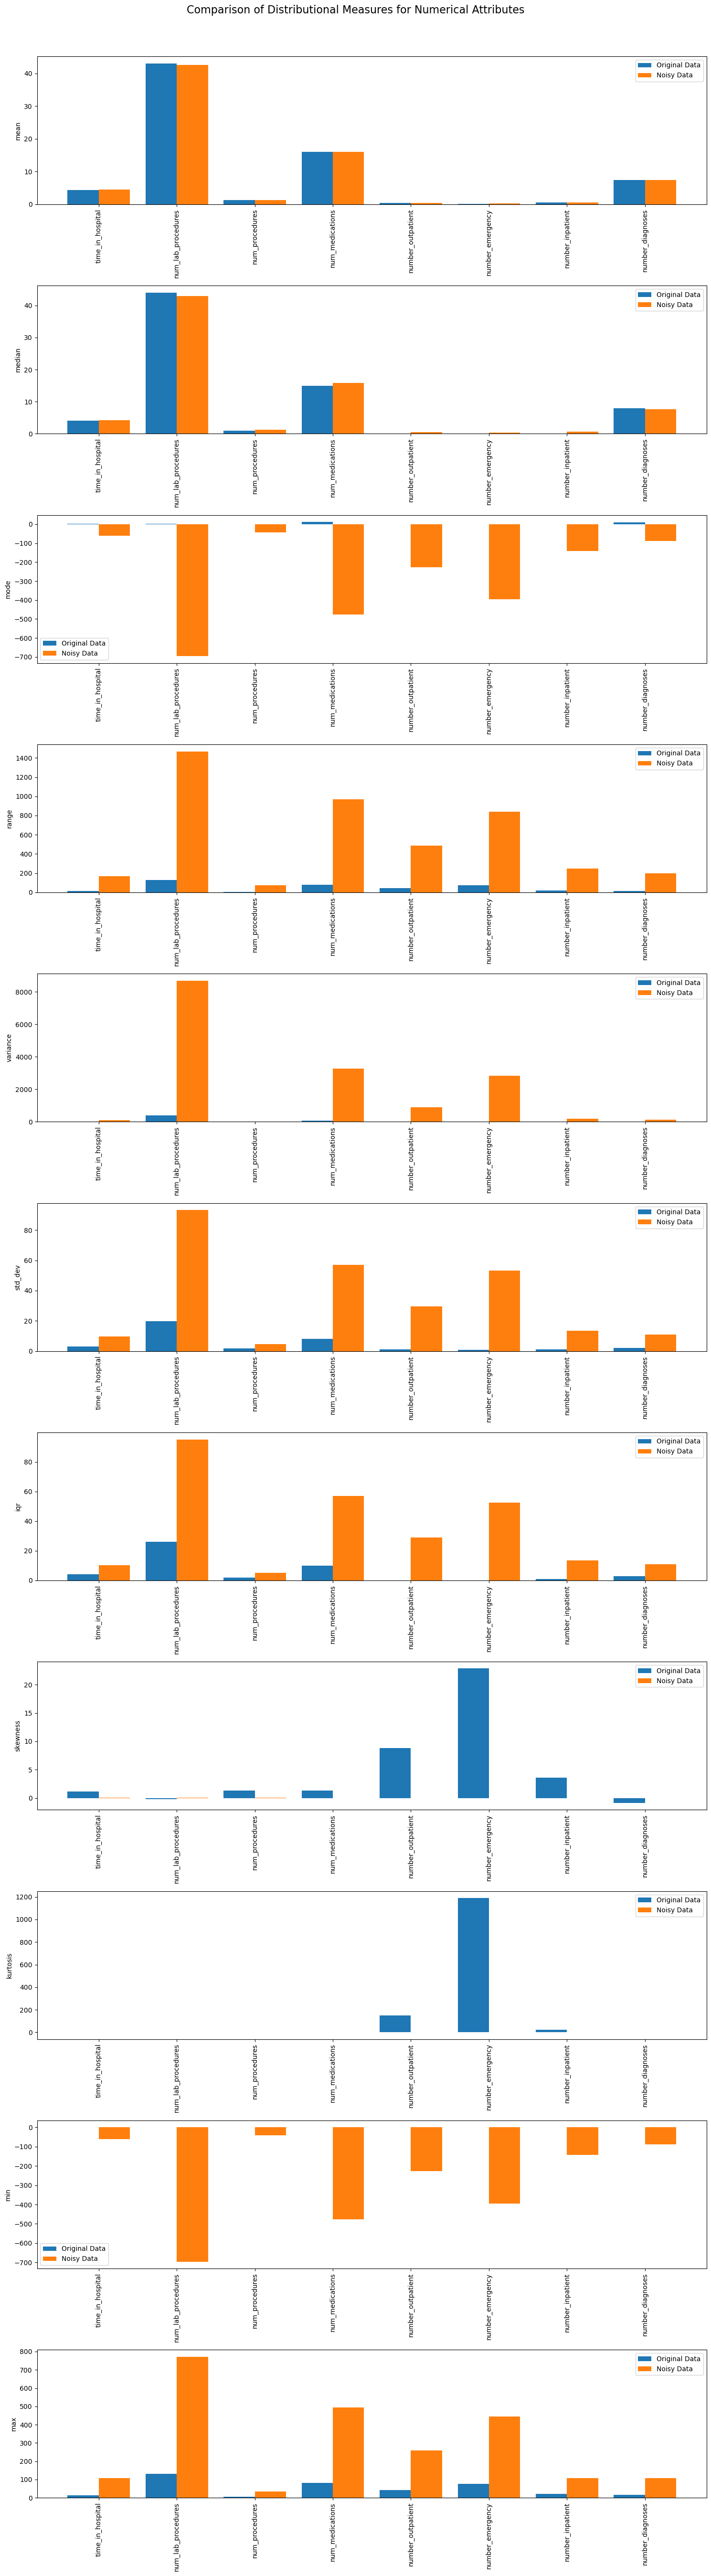

In [90]:
#Comparision for Distributional Measures for Original Data(Numerical Columns) and Noisy Data (Numerical Columns)Part 1:



# Function to calculate distributional measures
def calculate_distributional_measures(df, columns):
    measures = {}
    for col in columns:
        measures[col] = {
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode()[0],
            'range': df[col].max() - df[col].min(),
            'variance': df[col].var(),
            'std_dev': df[col].std(),
            'iqr': df[col].quantile(0.75) - df[col].quantile(0.25),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurt(),
            'min': df[col].min(),
            'max': df[col].max()
        }
    return pd.DataFrame(measures)

# Function to compare distributional measures and plot
def plot_distributional_comparison(df1_measures, df2_measures, title):
    df1_measures_transposed = df1_measures.transpose()
    df2_measures_transposed = df2_measures.transpose()

    metrics = df1_measures.index
    fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(15, len(metrics) * 5))
    fig.suptitle(title, fontsize=16)

    for i, metric in enumerate(metrics):
        ax = axes[i]
        width = 0.4
        ind = range(len(df1_measures.columns))

        df1_values = df1_measures.loc[metric].values
        df2_values = df2_measures.loc[metric].values

        ax.bar(ind, df1_values, width, label='Original Data')
        ax.bar([p + width for p in ind], df2_values, width, label='Noisy Data')

        ax.set_ylabel(metric)
        ax.set_xticks([p + width / 2 for p in ind])
        ax.set_xticklabels(df1_measures.columns, rotation=90)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Calculate measures for the original and noisy dataframes
original_measures = calculate_distributional_measures(df_original, numerical_columns)
noisy_measures = calculate_distributional_measures(df_noisy1, numerical_columns)

# Display the results
print("Distributional Measures for Original Data:")
print(original_measures)

print("\nDistributional Measures for Noisy Data:")
print(noisy_measures)

# Plot the comparison of distributional measures
plot_distributional_comparison(original_measures, noisy_measures, "Comparison of Distributional Measures for Numerical Attributes")




Range of Changes Report:
            time_in_hospital    num_lab_procedures    num_procedures  \
mean          (0.005, 0.059)        (0.018, 0.427)      (0.0, 0.021)   
median        (0.183, 0.261)        (0.439, 1.128)     (0.163, 0.19)   
mode        (63.612, 85.543)     (592.032, 781.44)  (29.101, 42.324)   
range     (128.153, 155.846)  (1161.467, 1525.685)  (58.337, 70.347)   
variance    (83.689, 85.188)  (8302.923, 8653.641)  (17.863, 18.177)   
std_dev       (6.638, 6.715)      (73.546, 75.408)    (2.852, 2.886)   
iqr           (6.217, 6.269)       (69.08, 71.393)    (2.961, 3.014)   
skewness       (1.084, 1.14)         (0.206, 0.27)    (1.228, 1.272)   
kurtosis       (1.532, 1.72)        (2.754, 3.215)    (1.239, 1.452)   
min         (61.612, 83.543)     (592.032, 781.44)  (29.101, 42.324)   
max         (54.447, 94.233)    (569.435, 876.235)    (25.07, 38.05)   

               num_medications   number_outpatient      number_emergency  \
mean            (0.019, 0.265)    

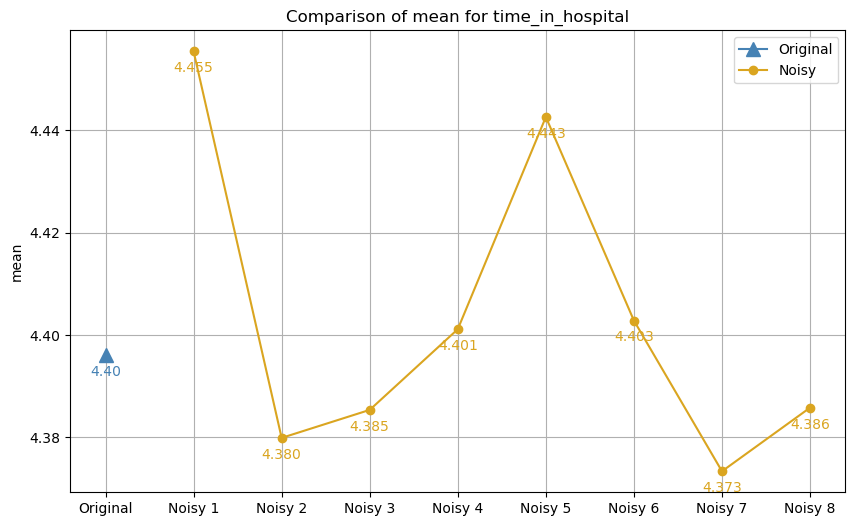

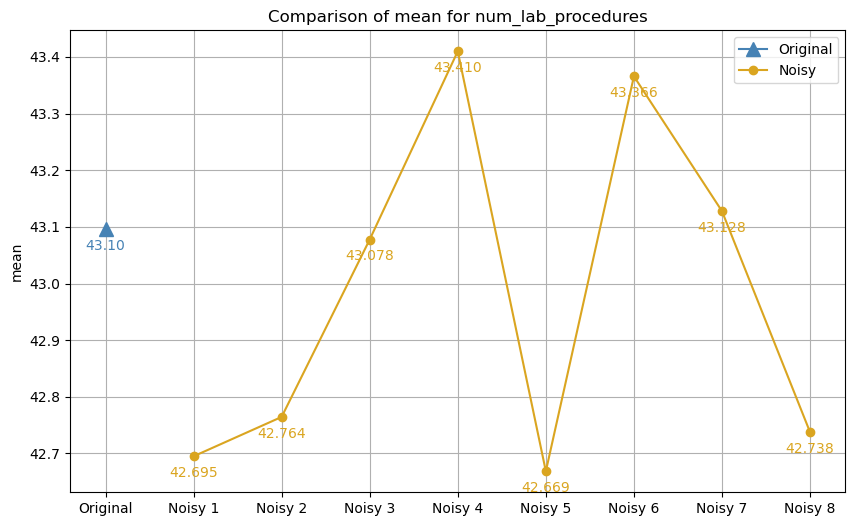

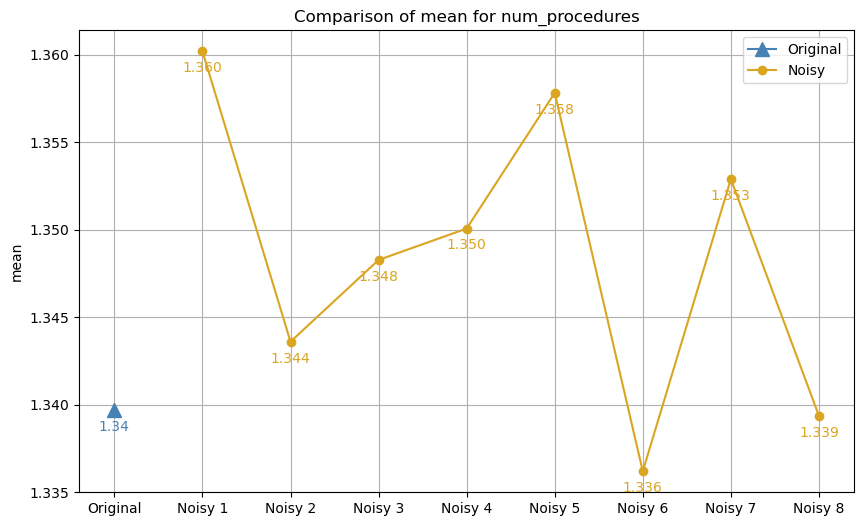

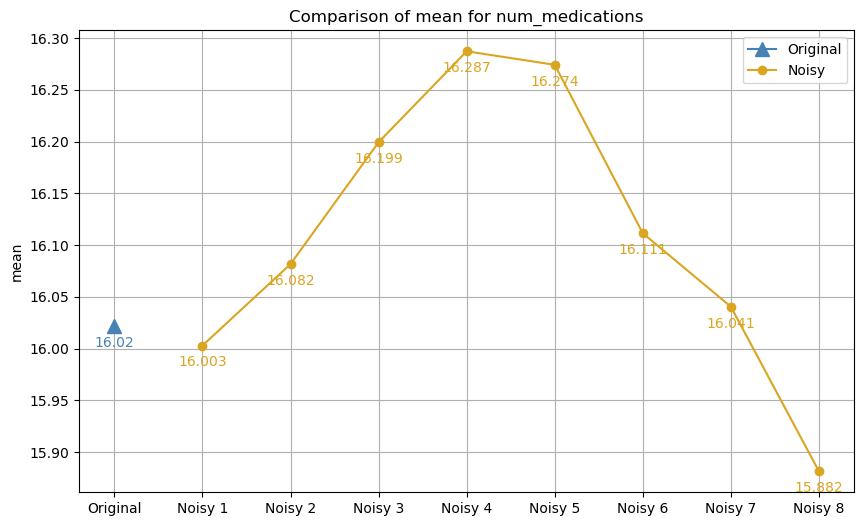

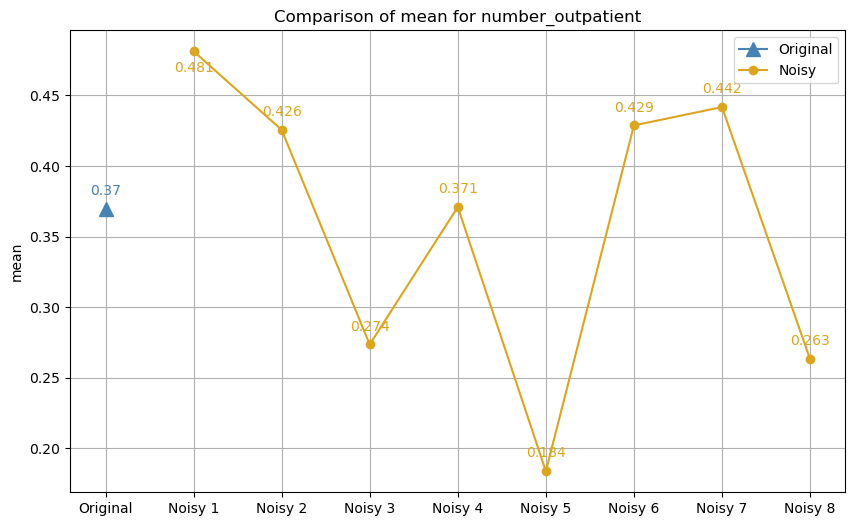

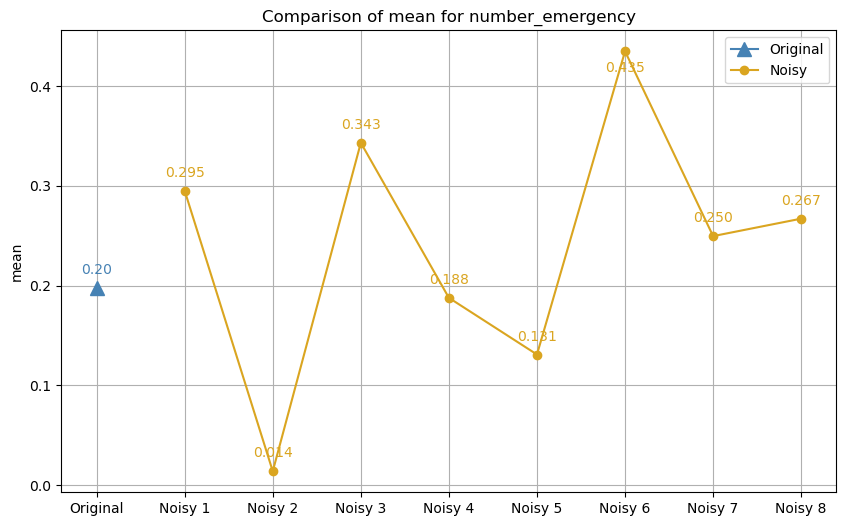

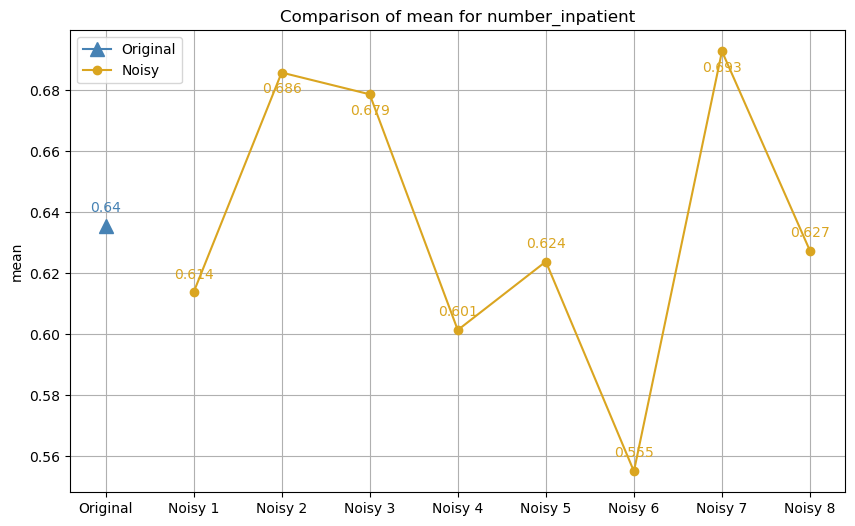

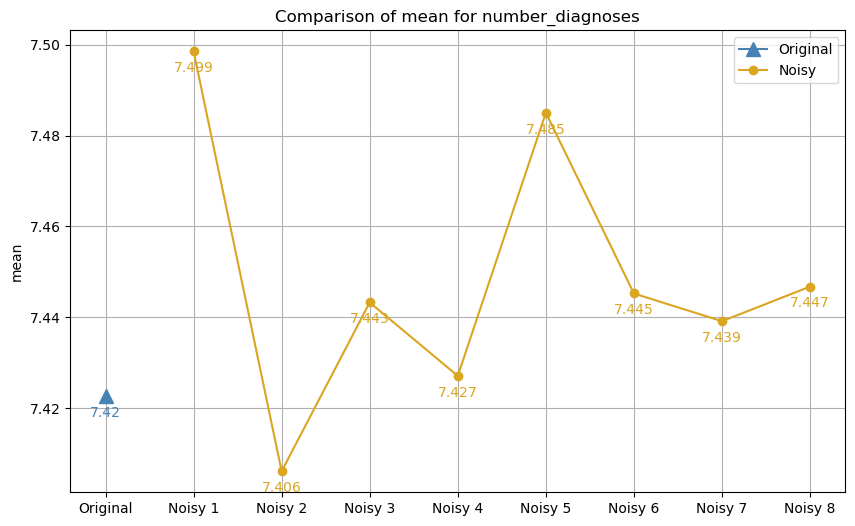

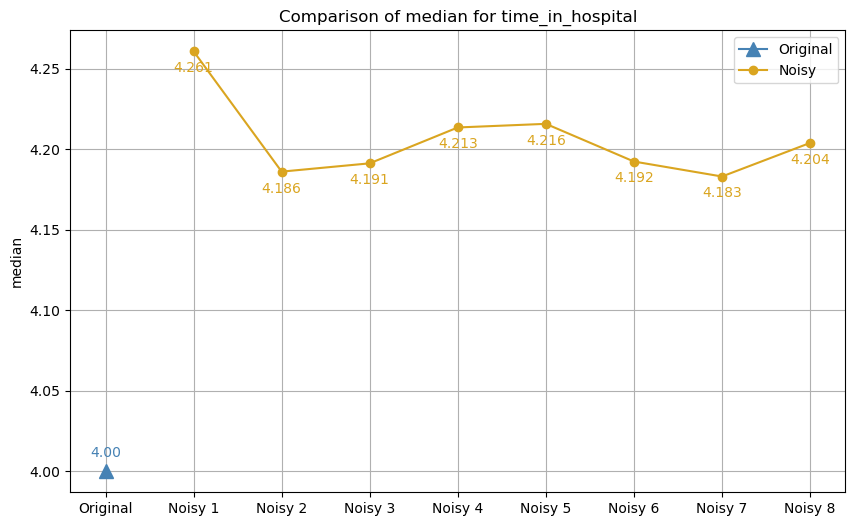

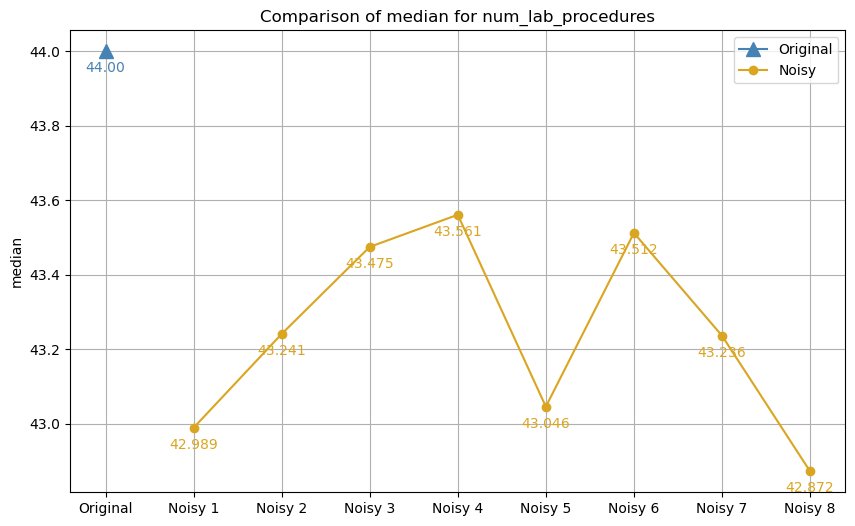

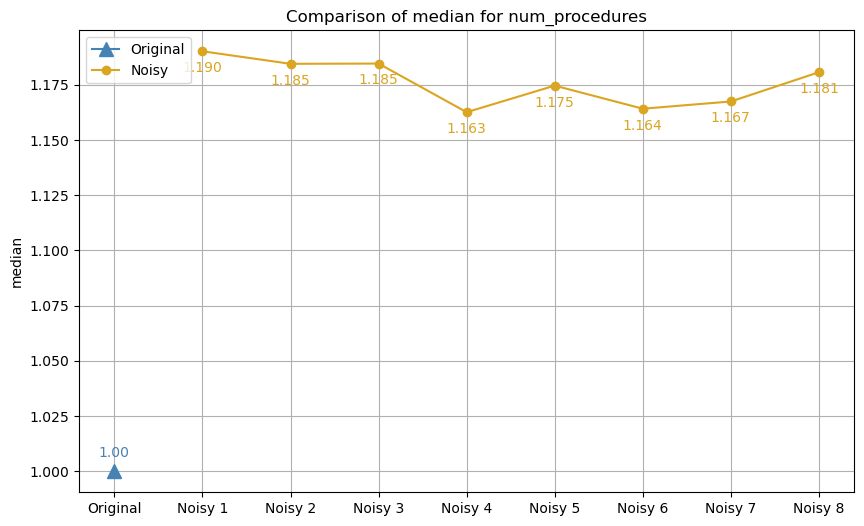

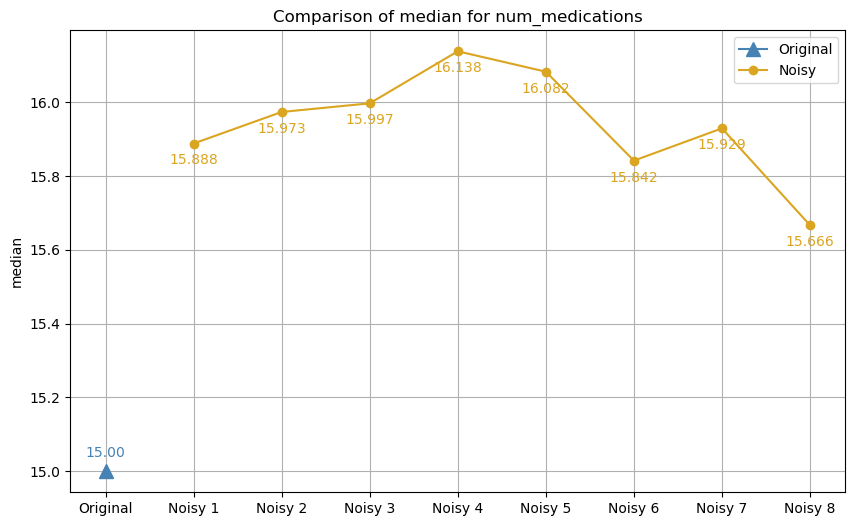

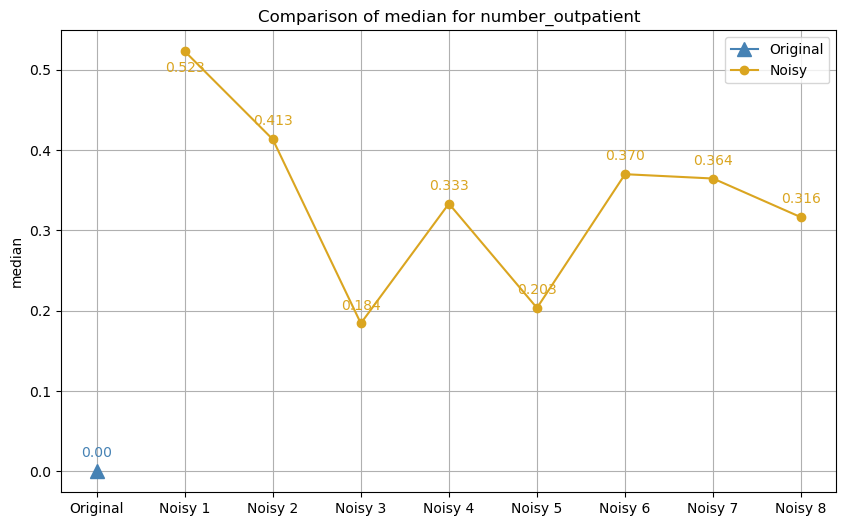

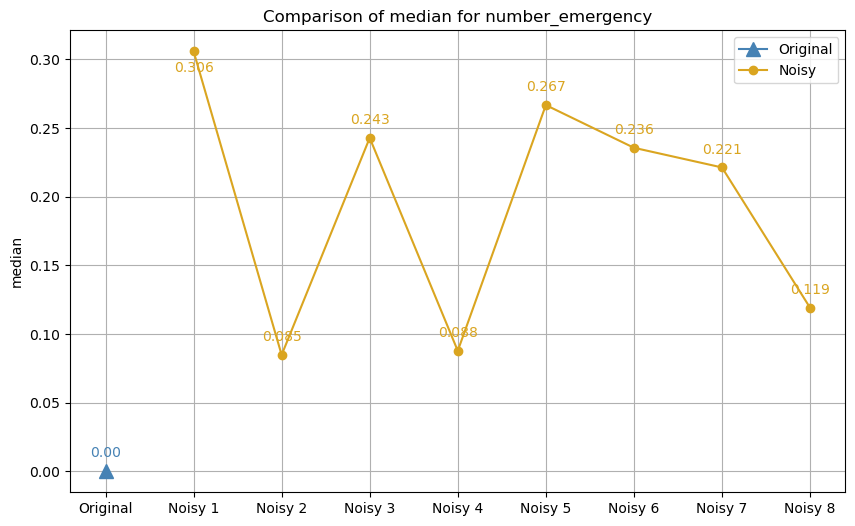

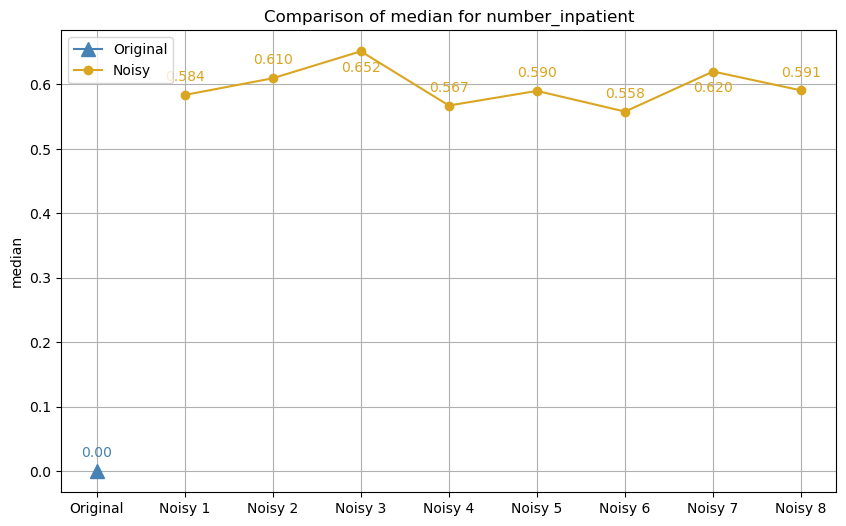

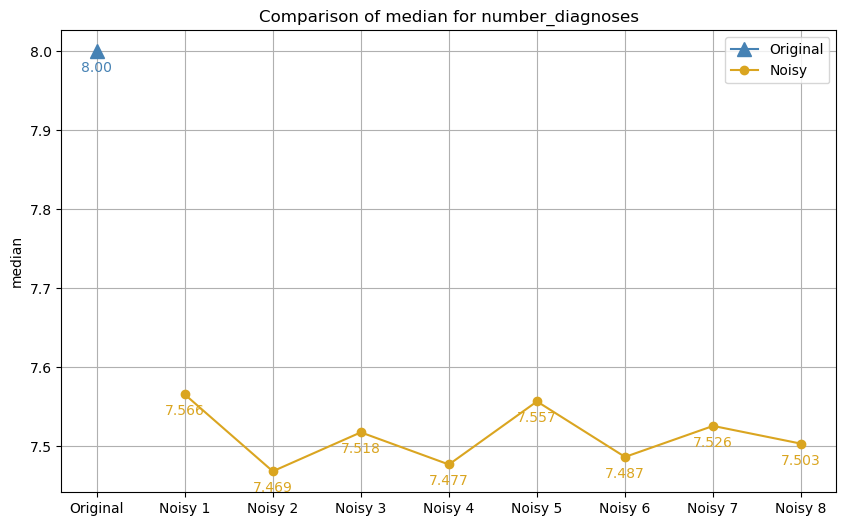

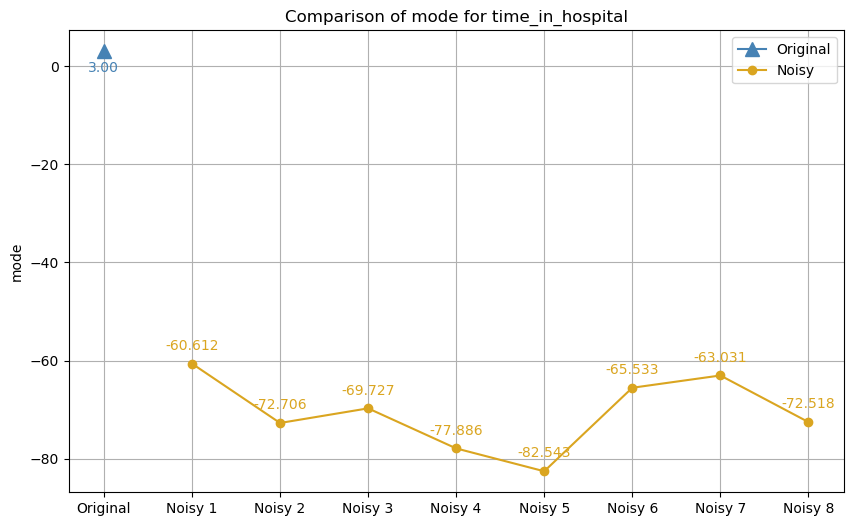

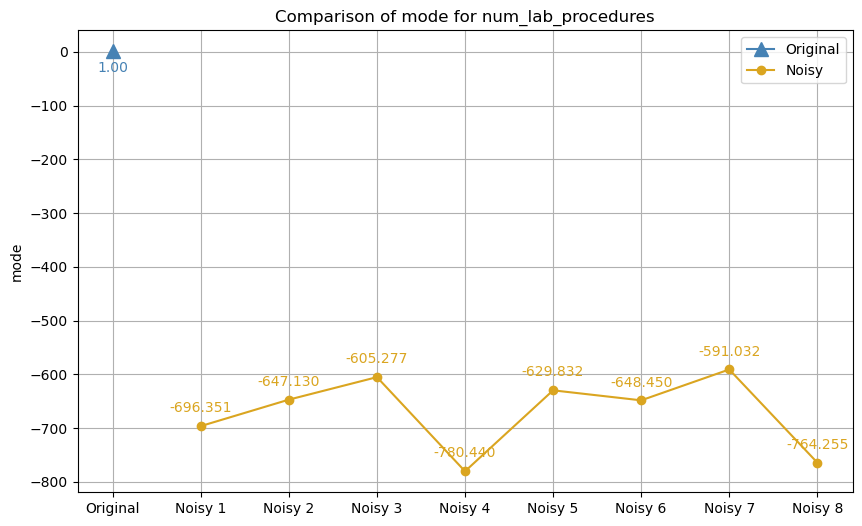

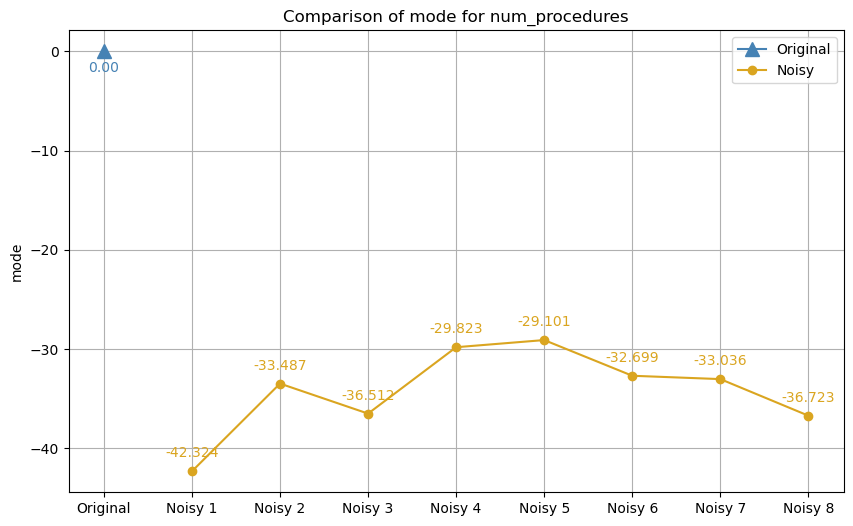

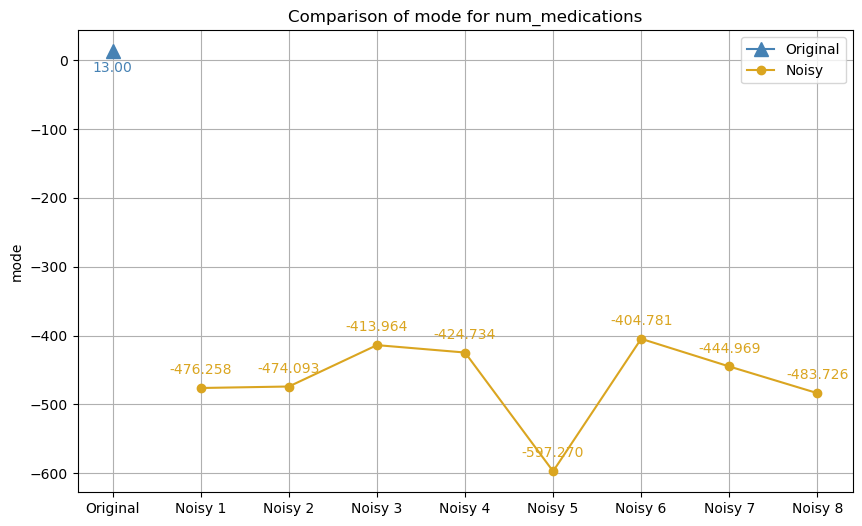

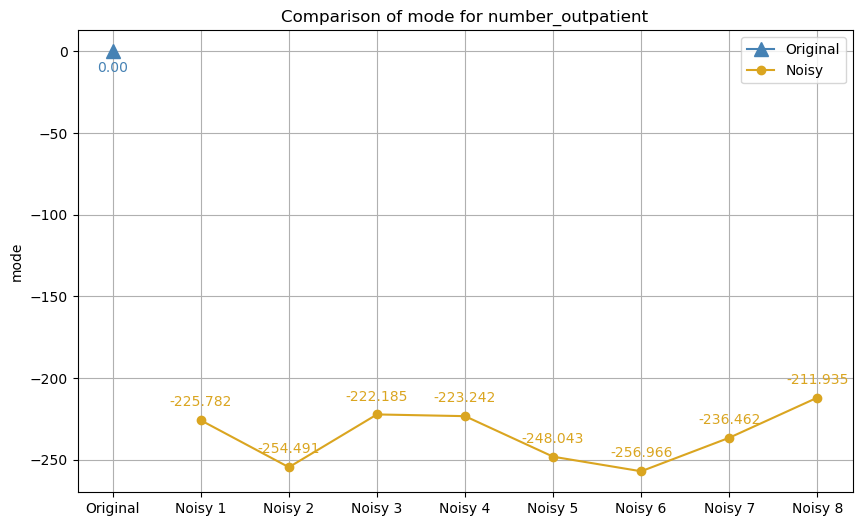

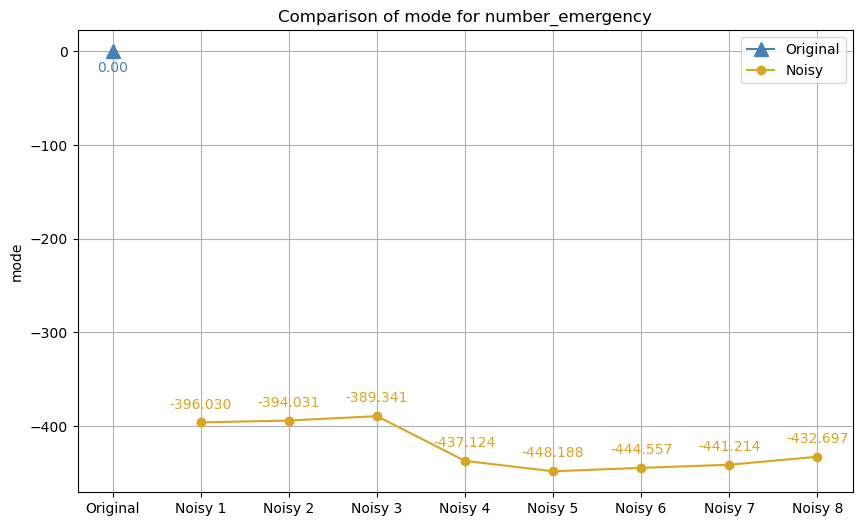

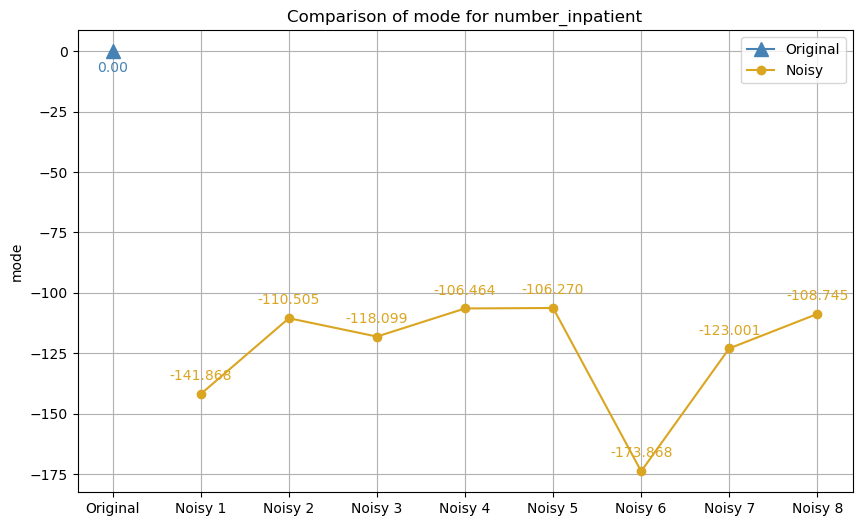

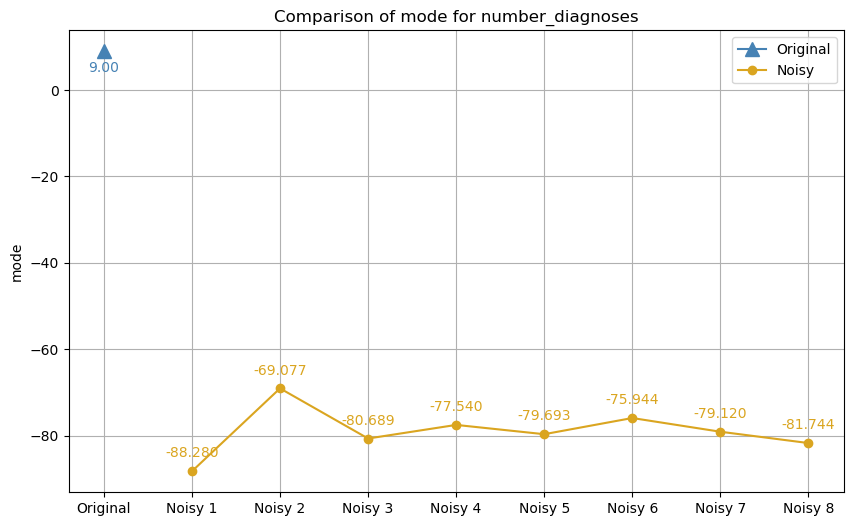

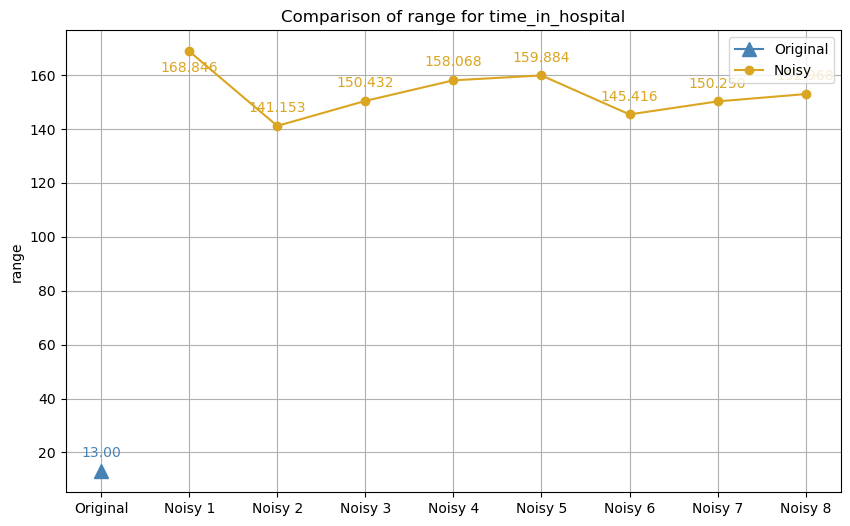

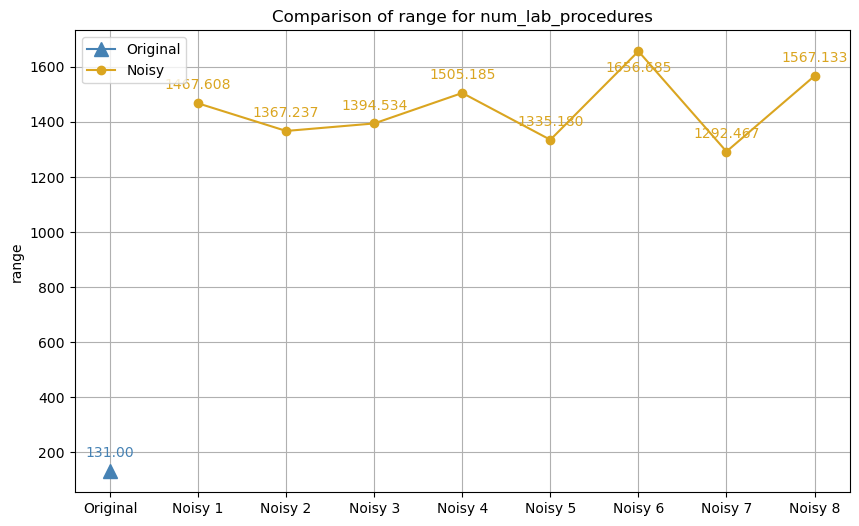

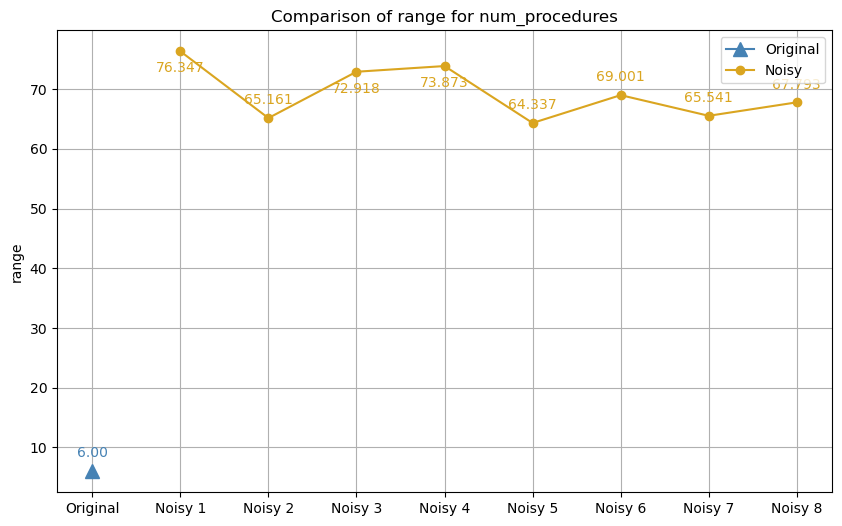

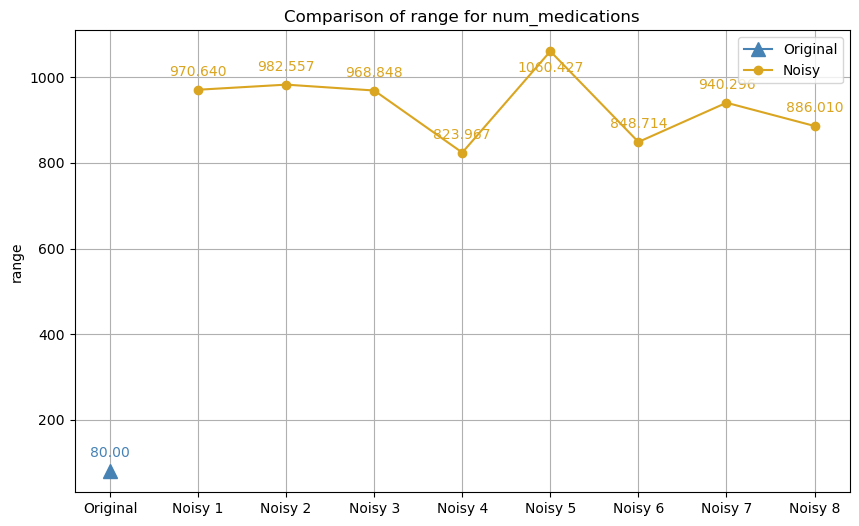

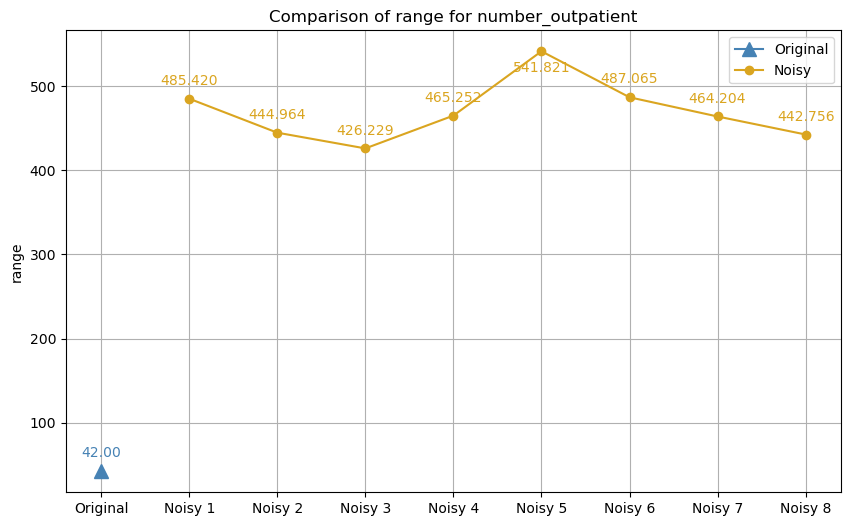

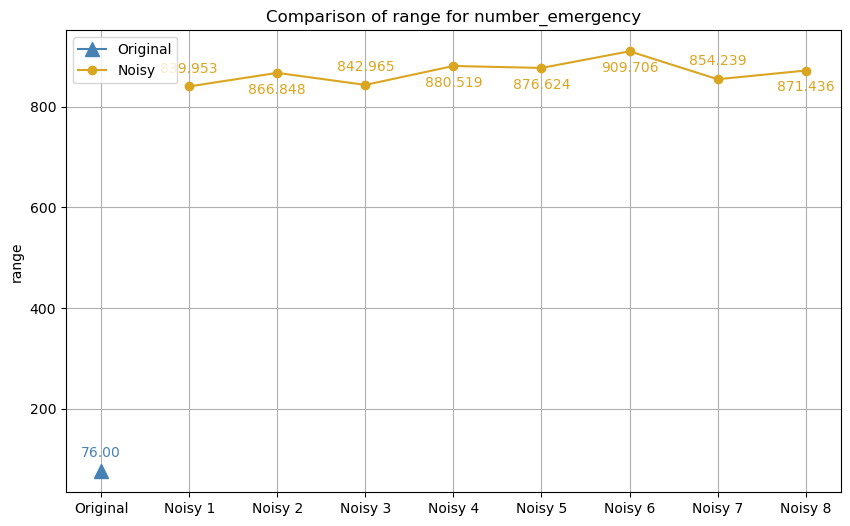

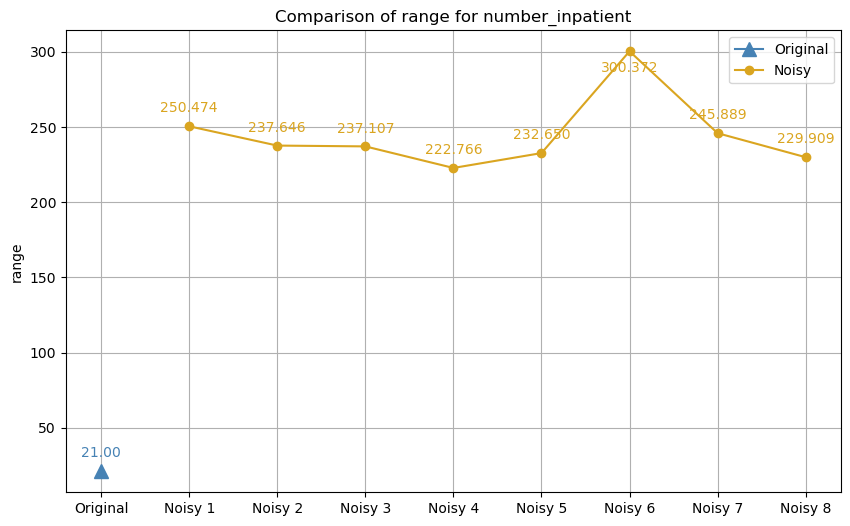

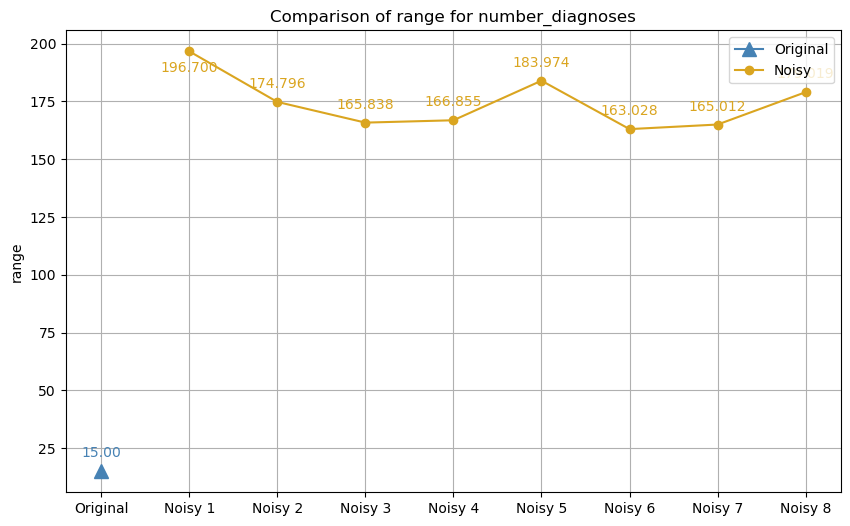

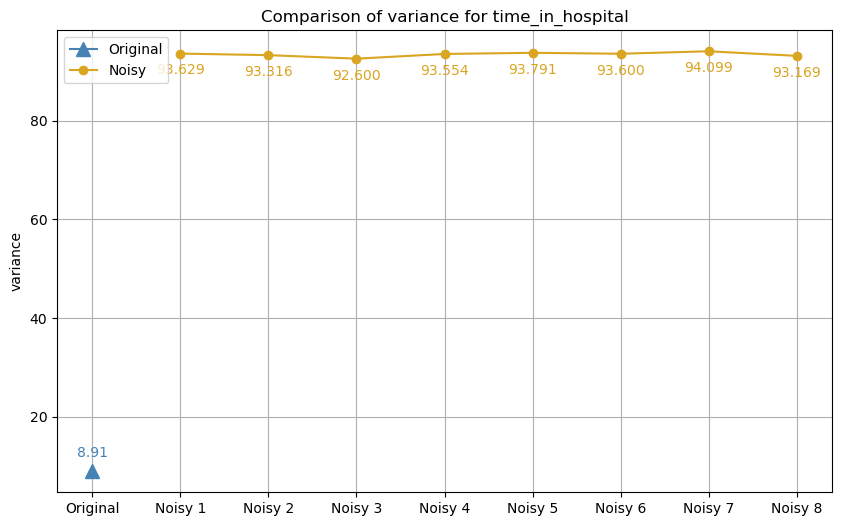

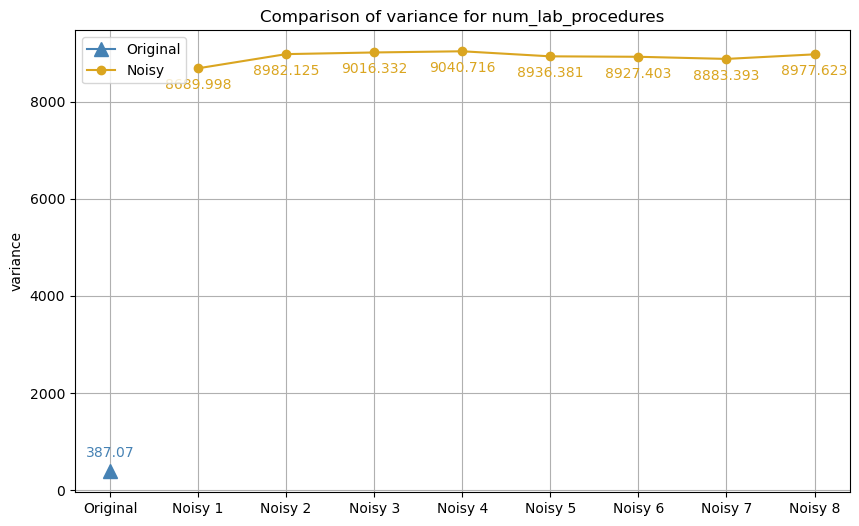

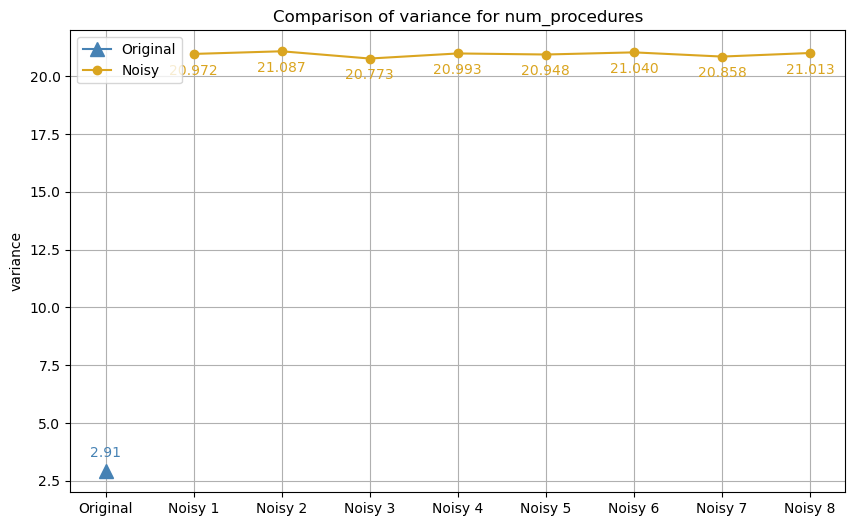

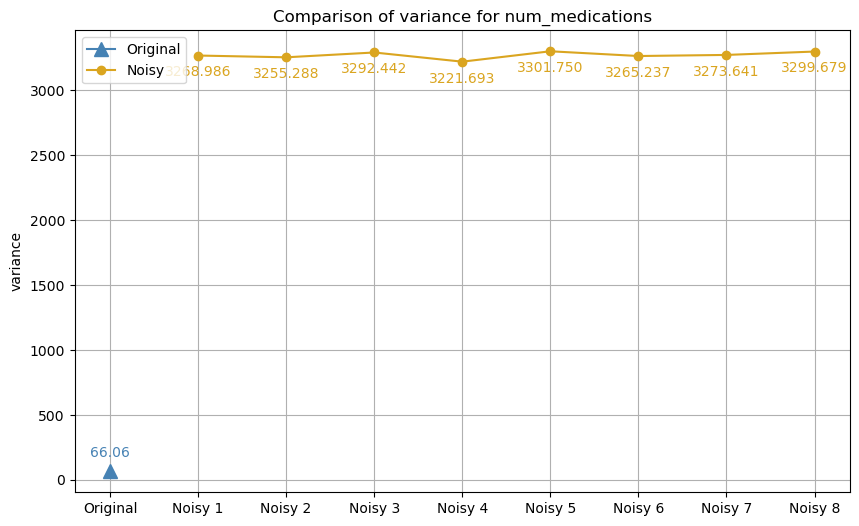

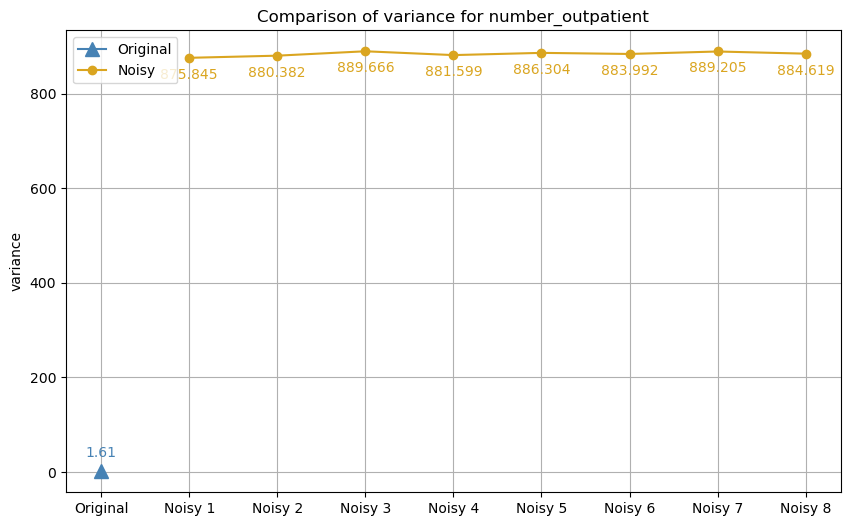

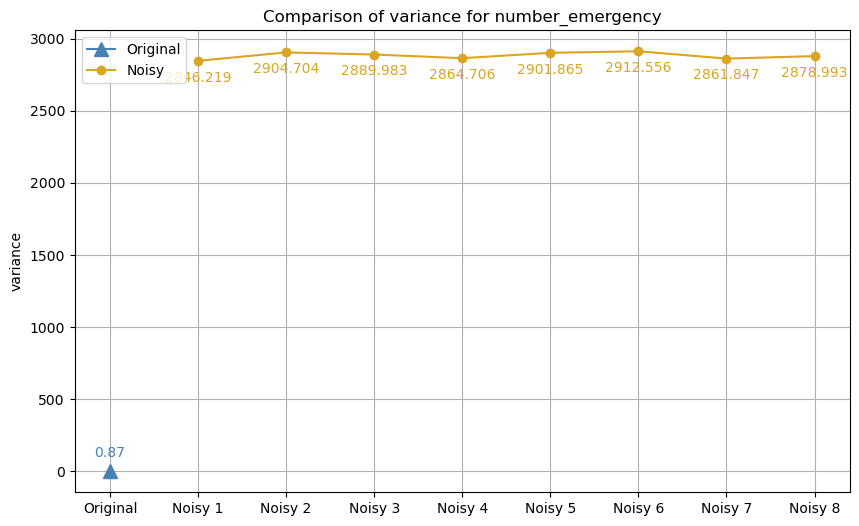

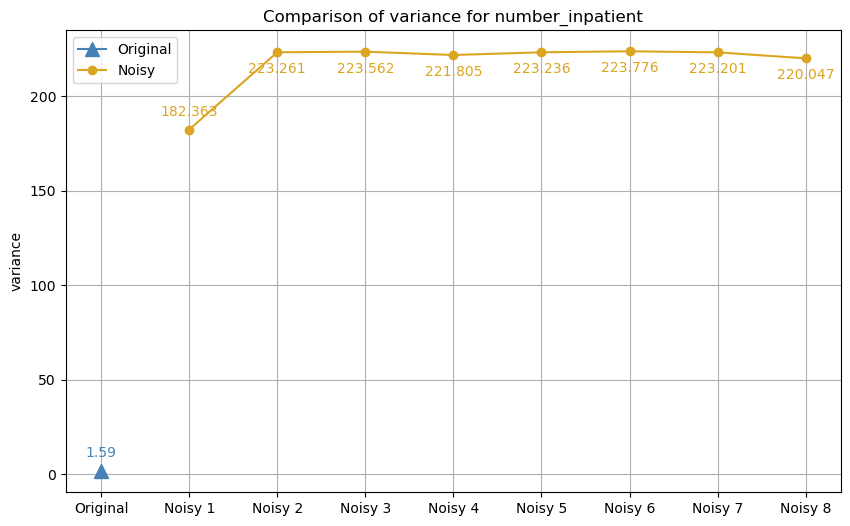

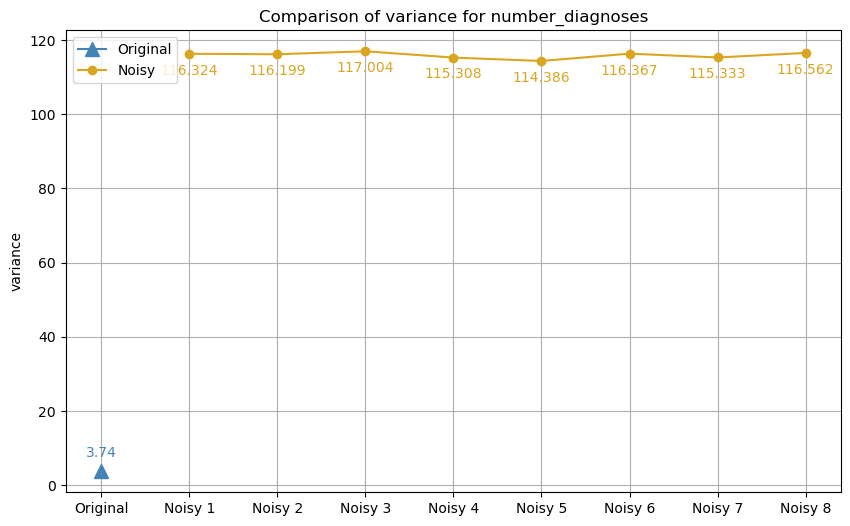

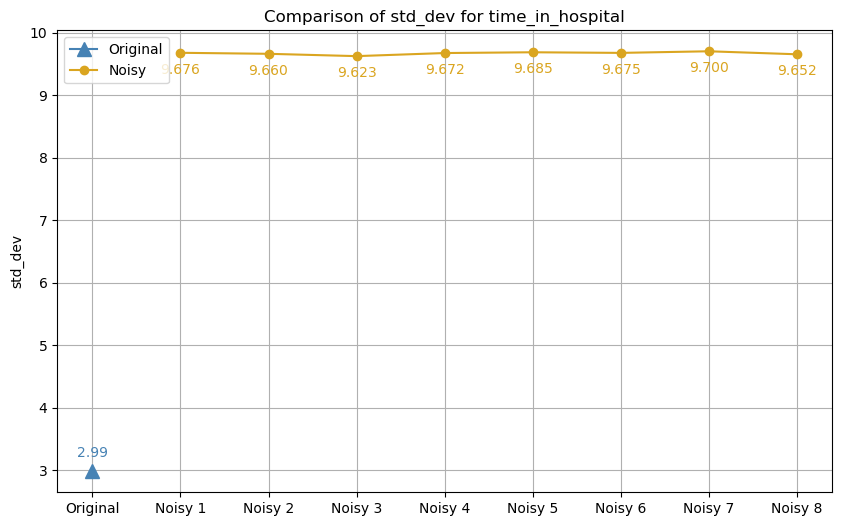

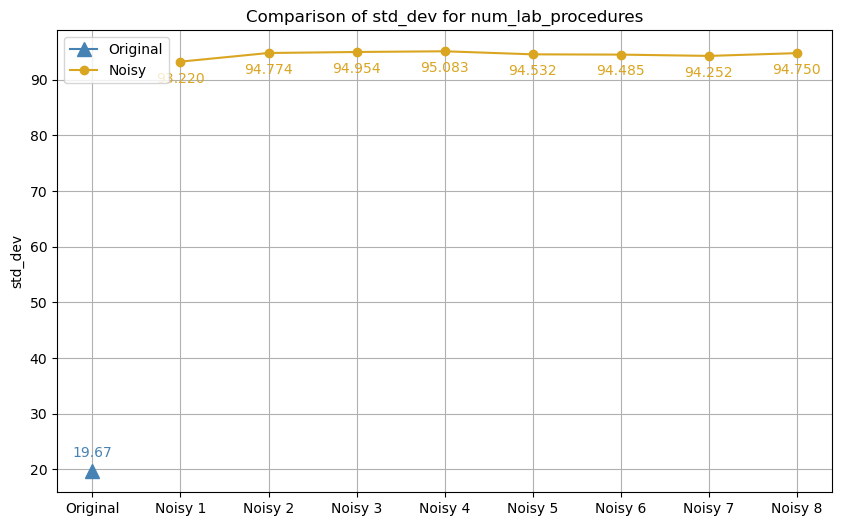

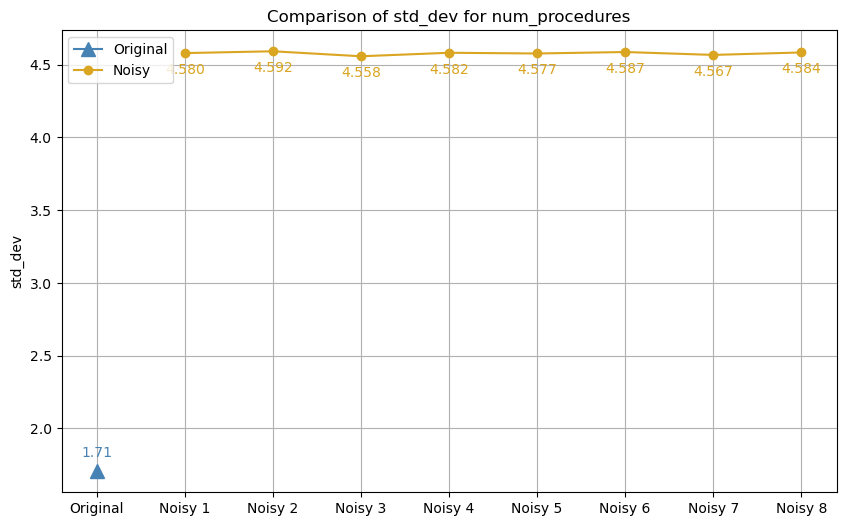

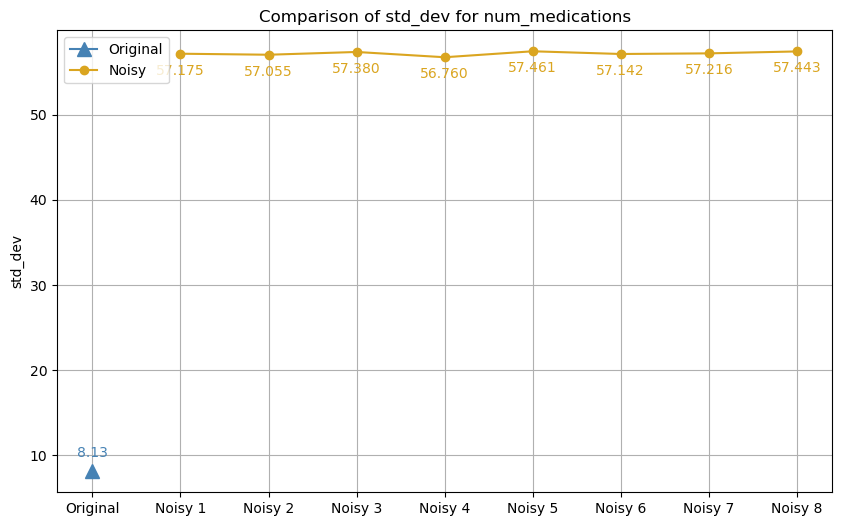

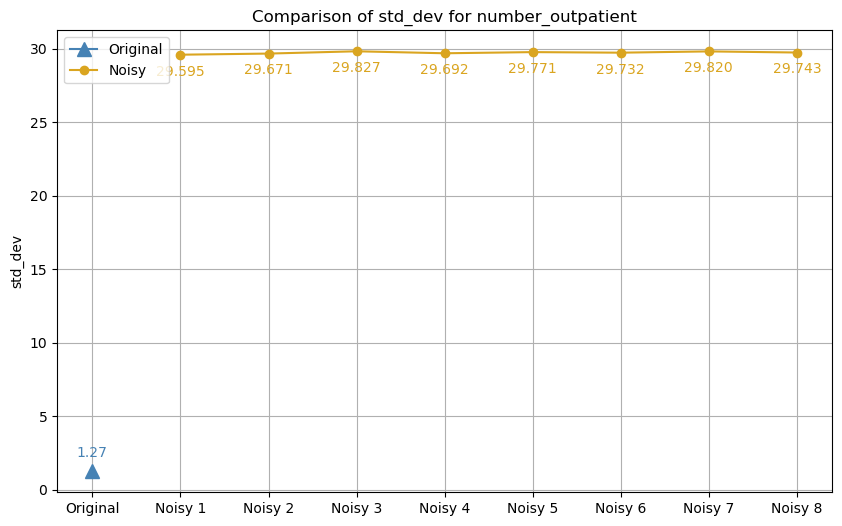

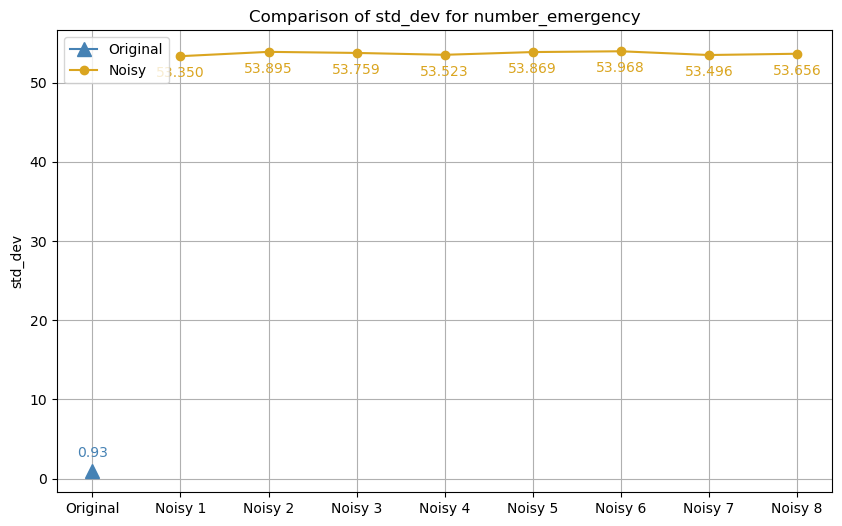

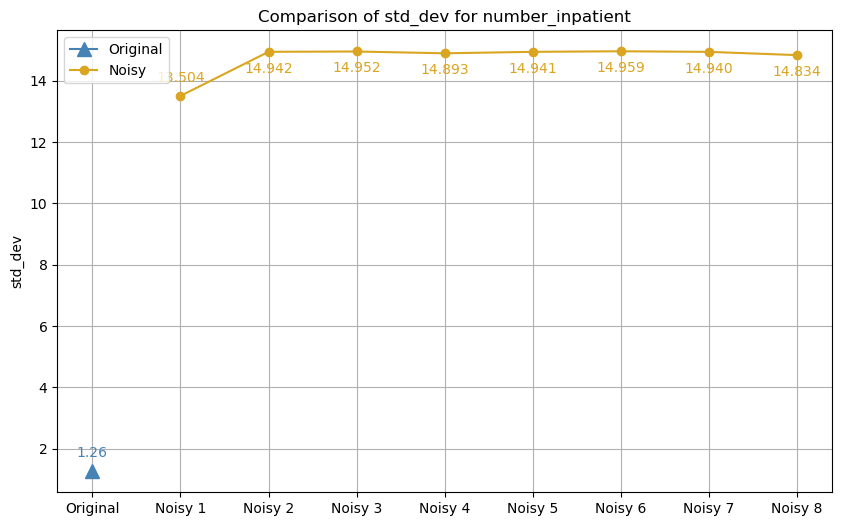

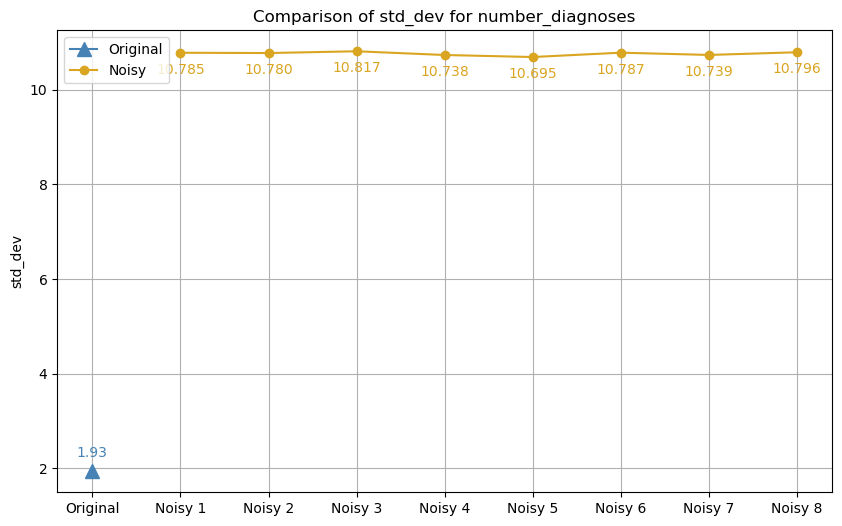

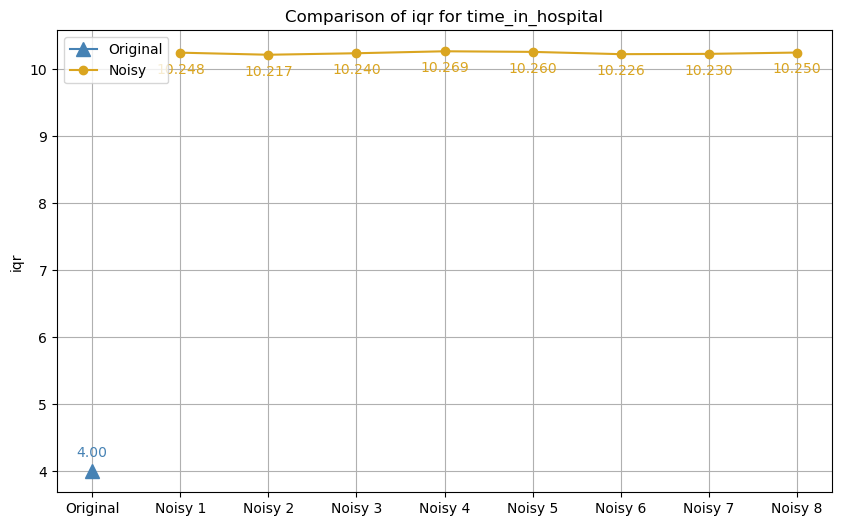

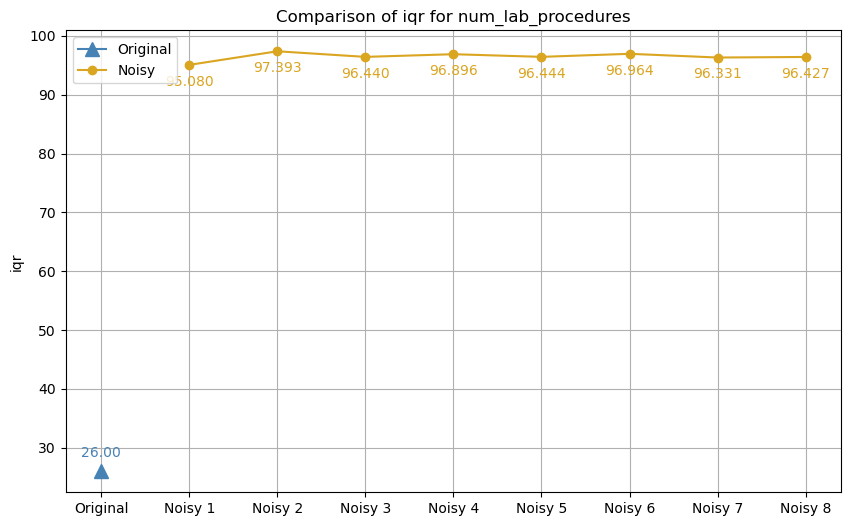

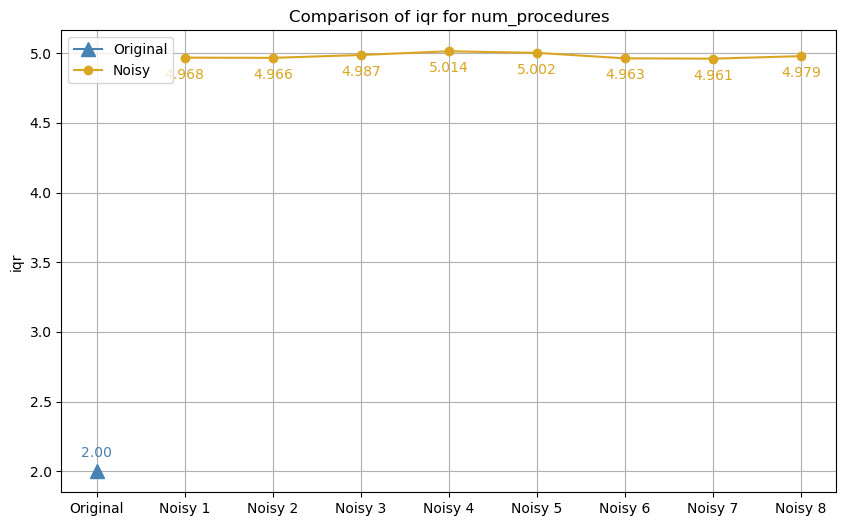

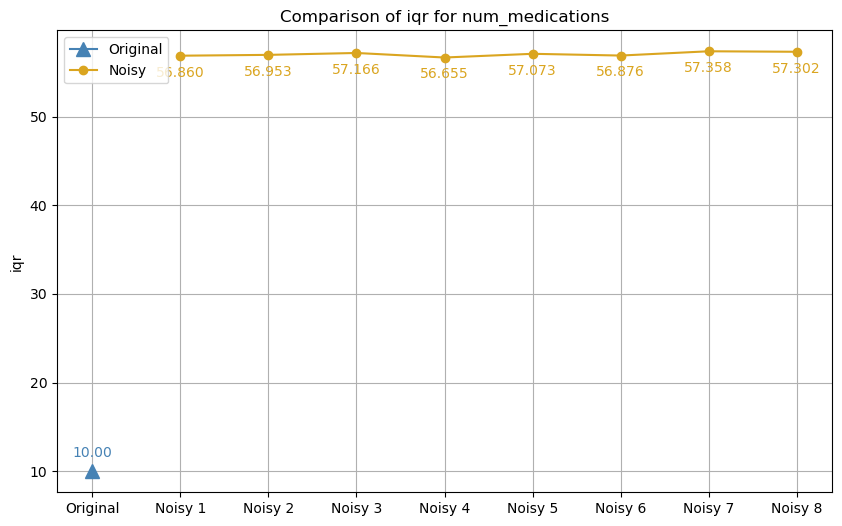

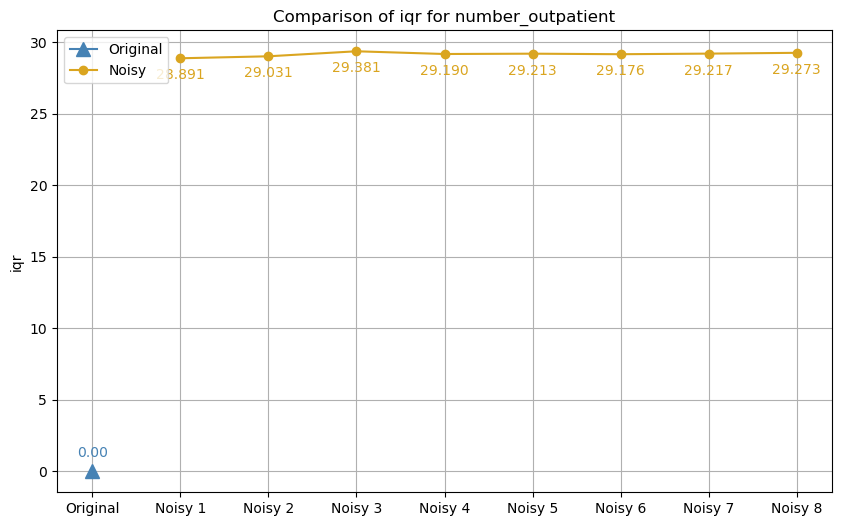

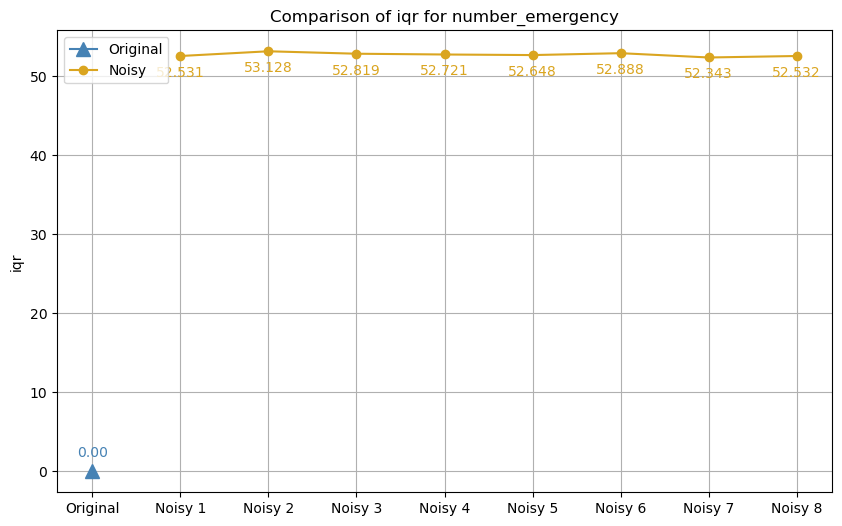

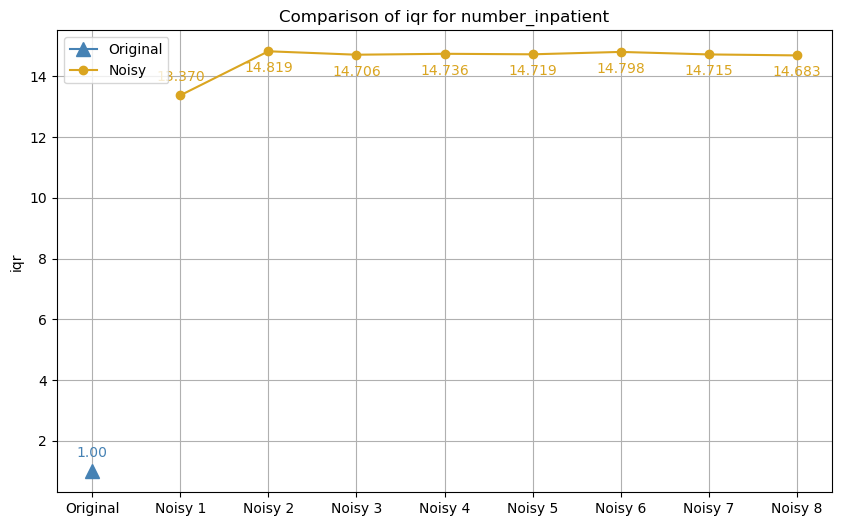

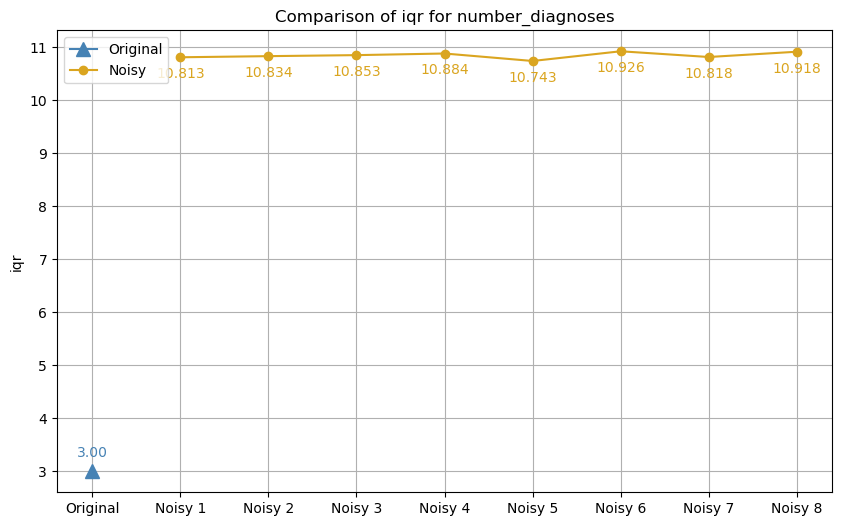

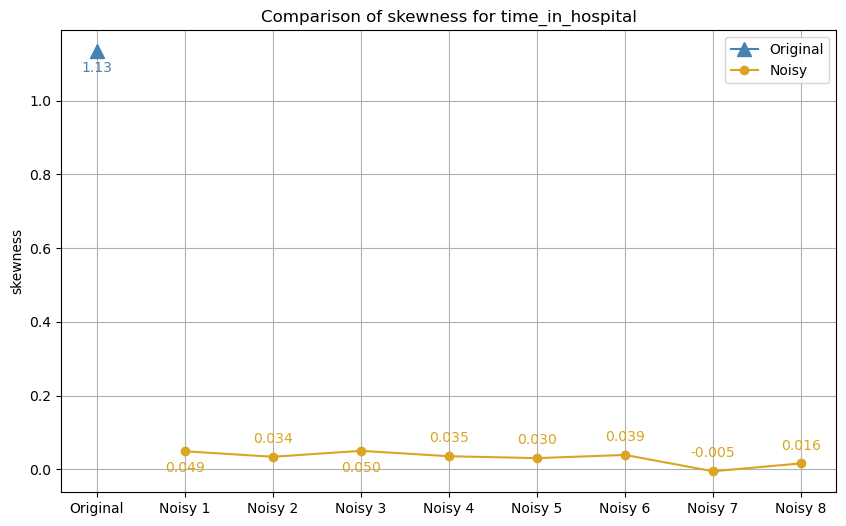

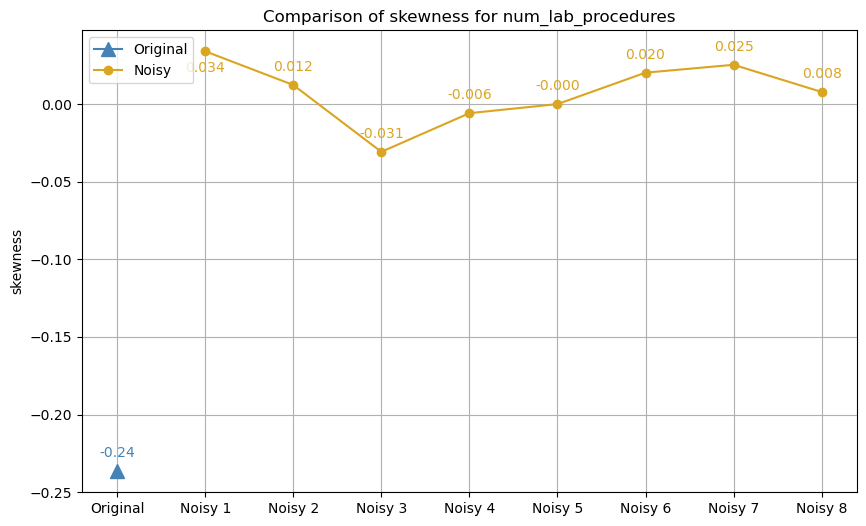

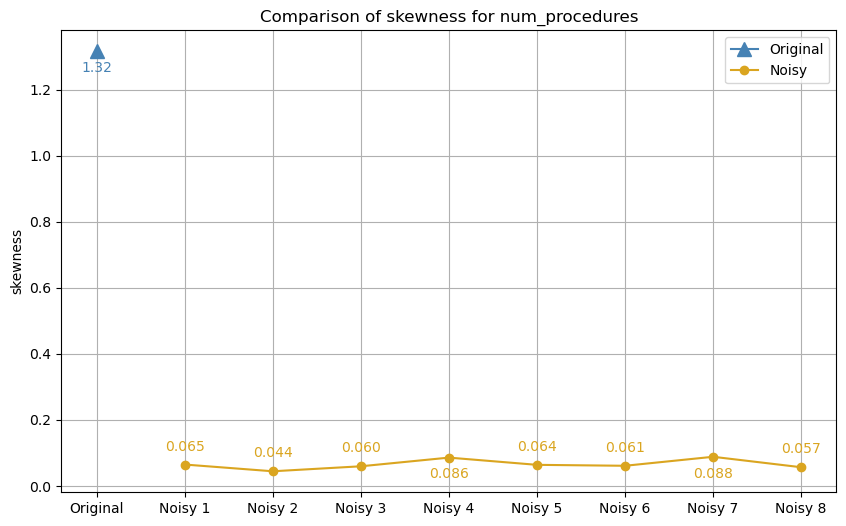

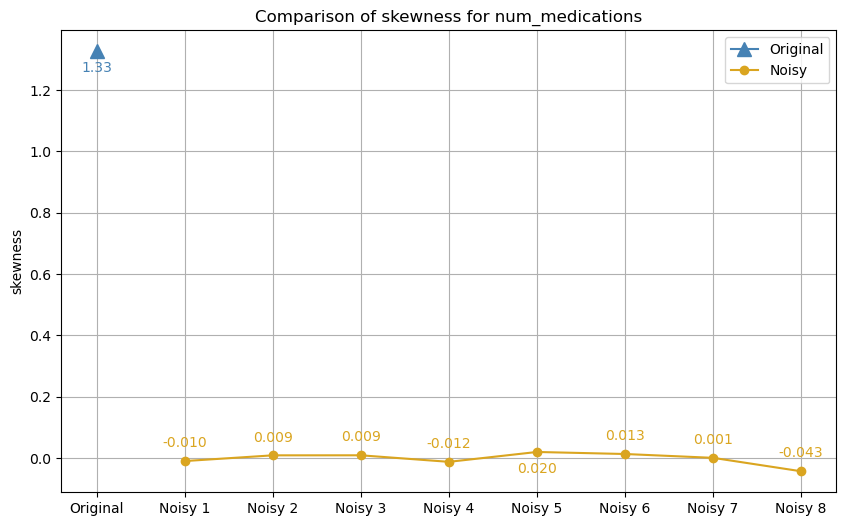

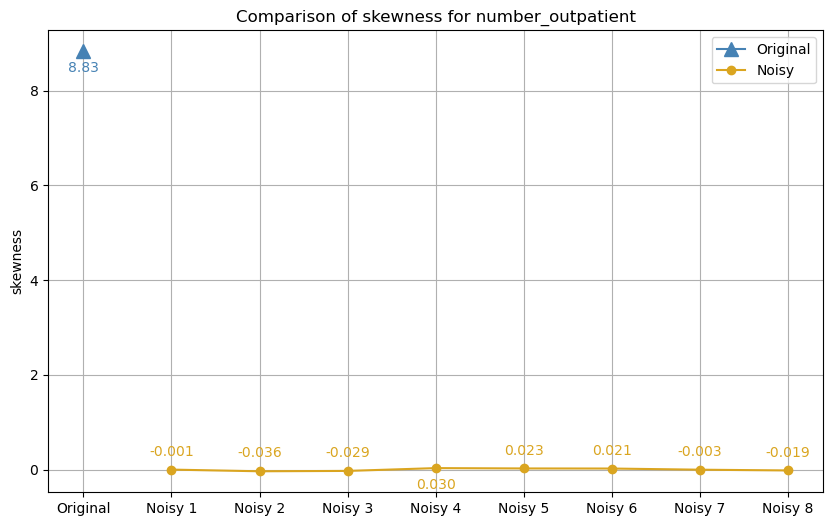

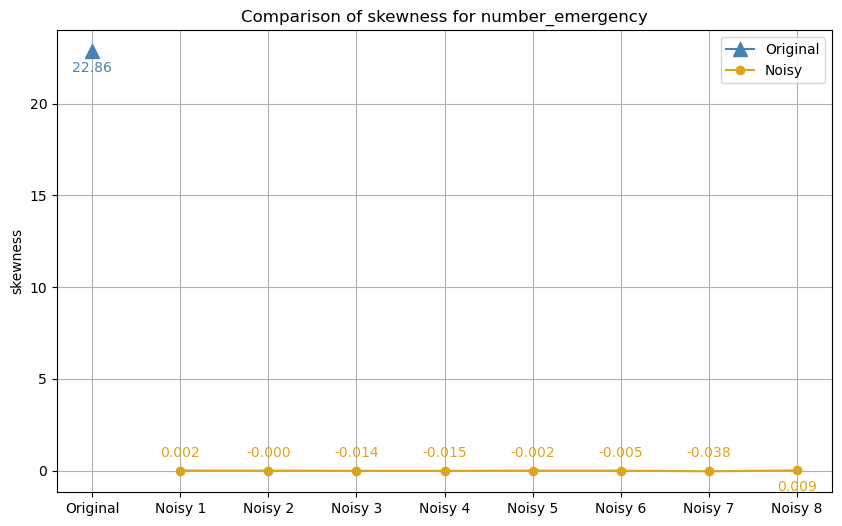

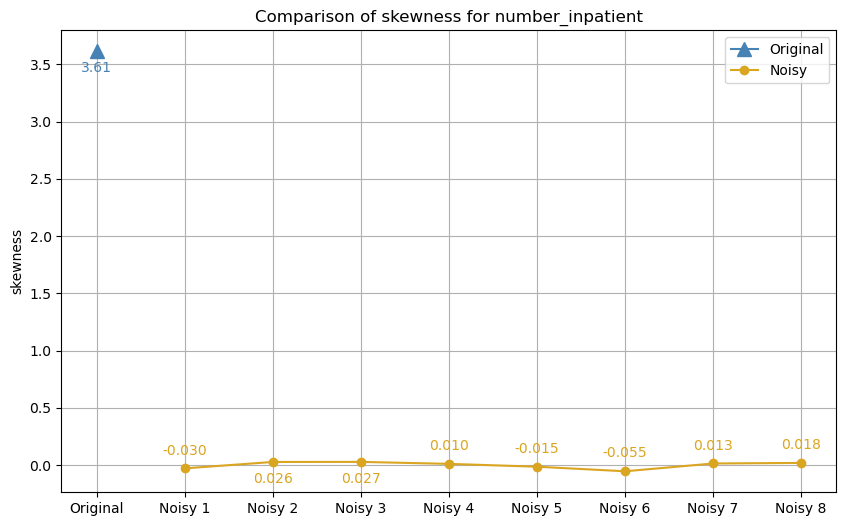

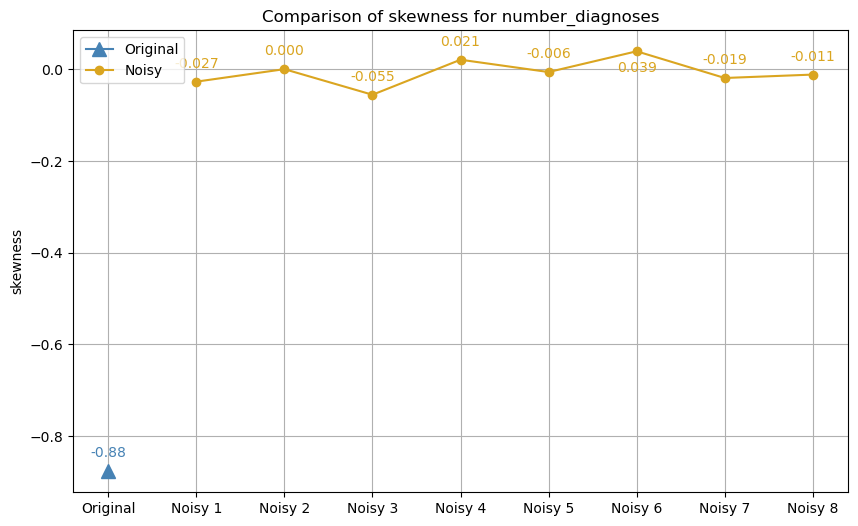

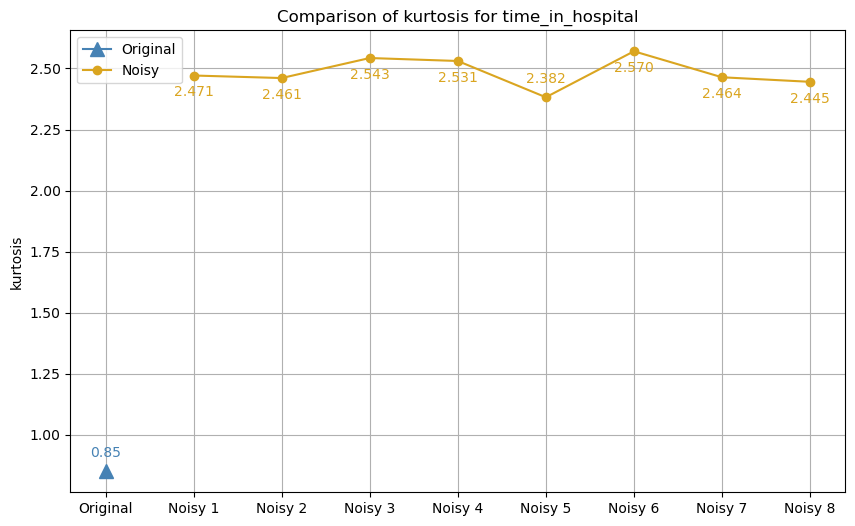

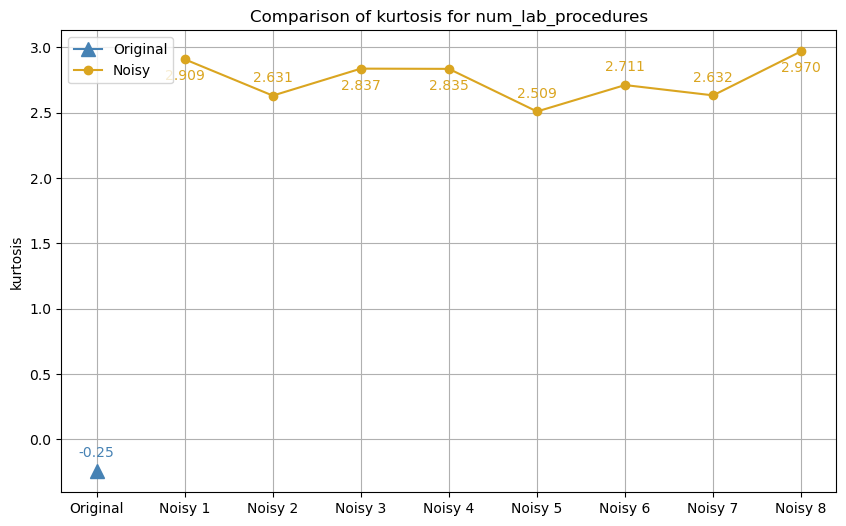

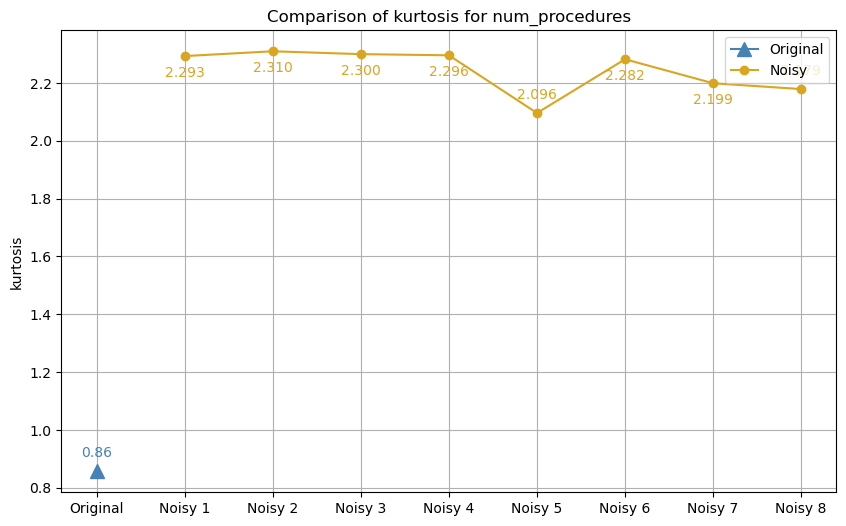

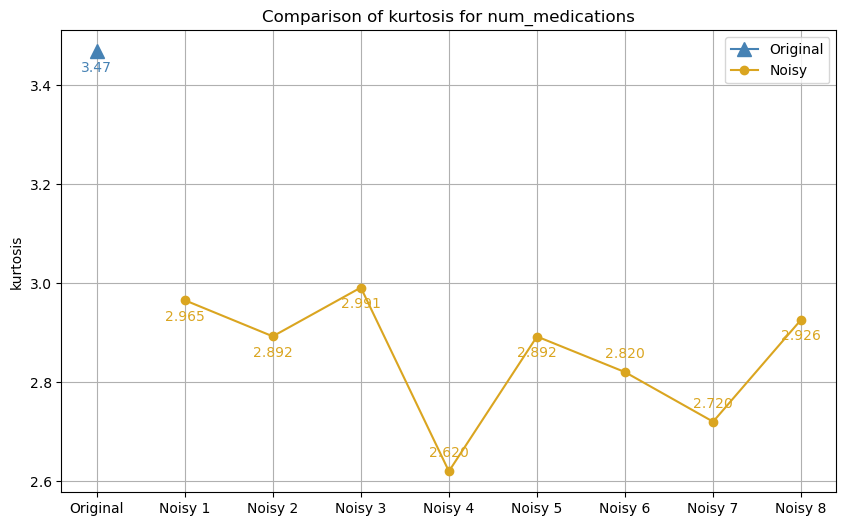

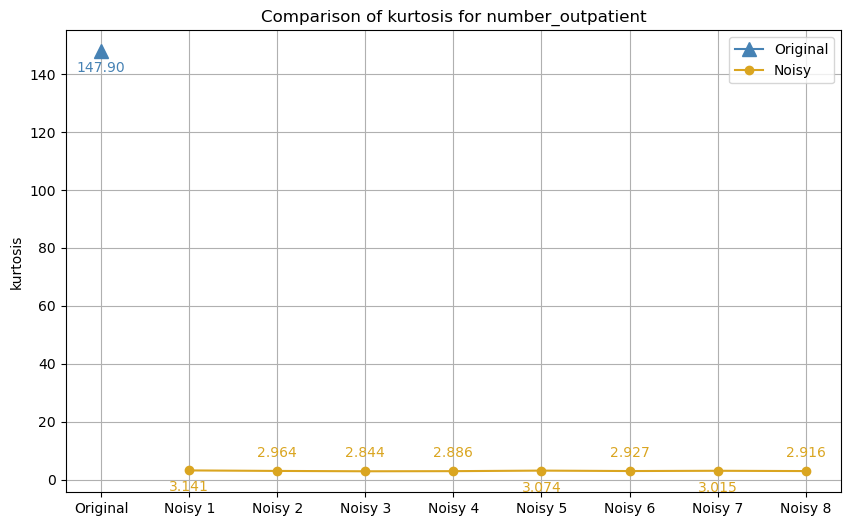

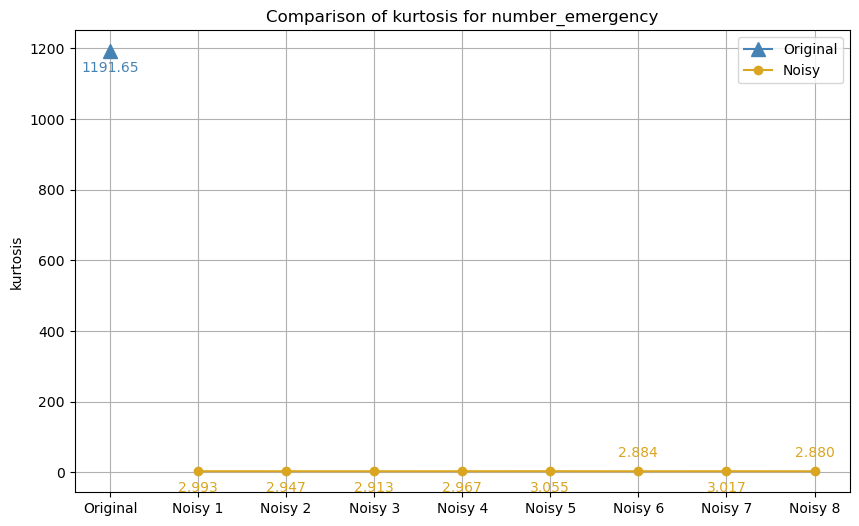

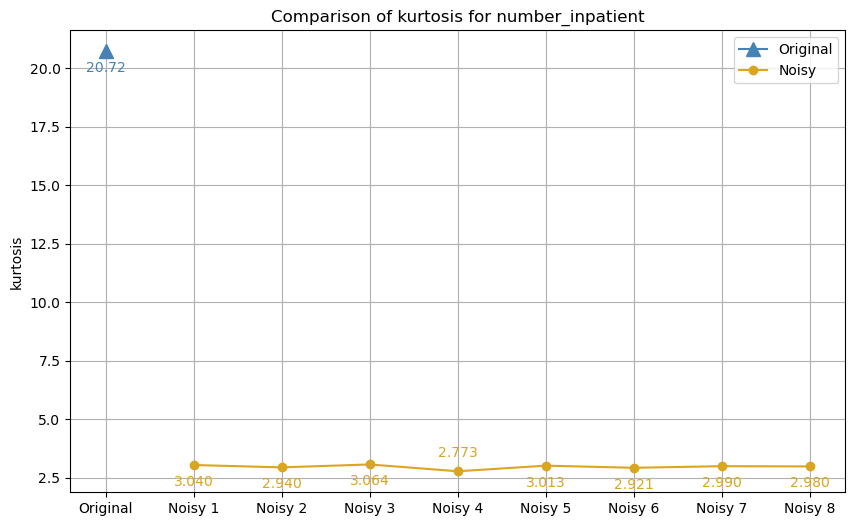

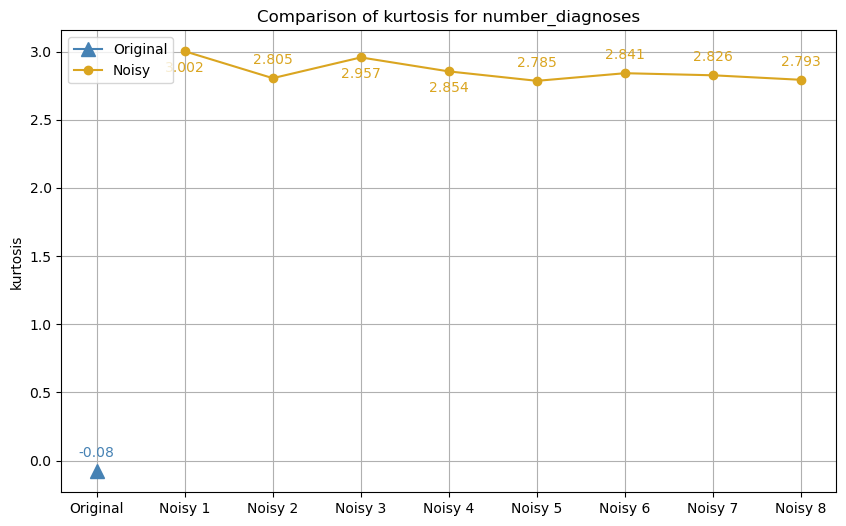

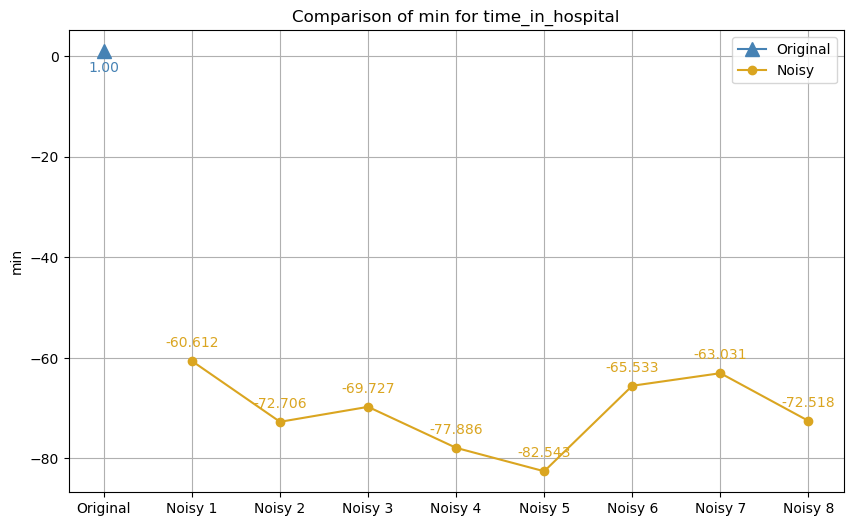

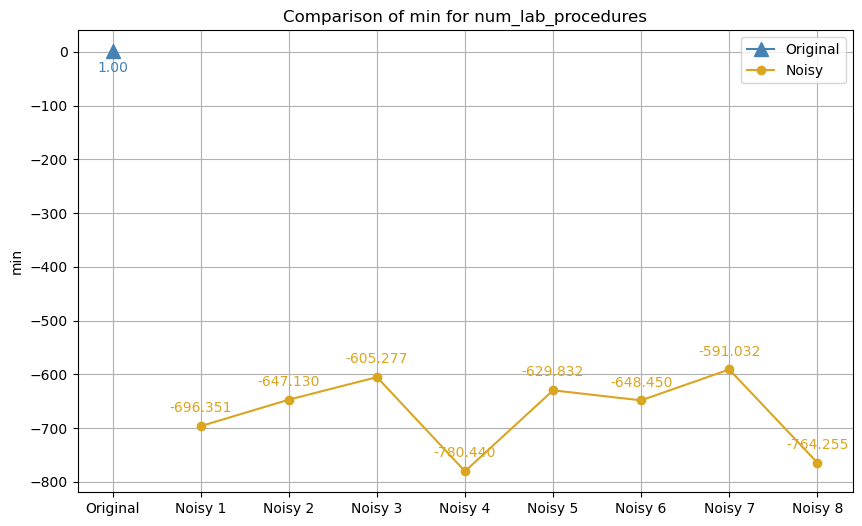

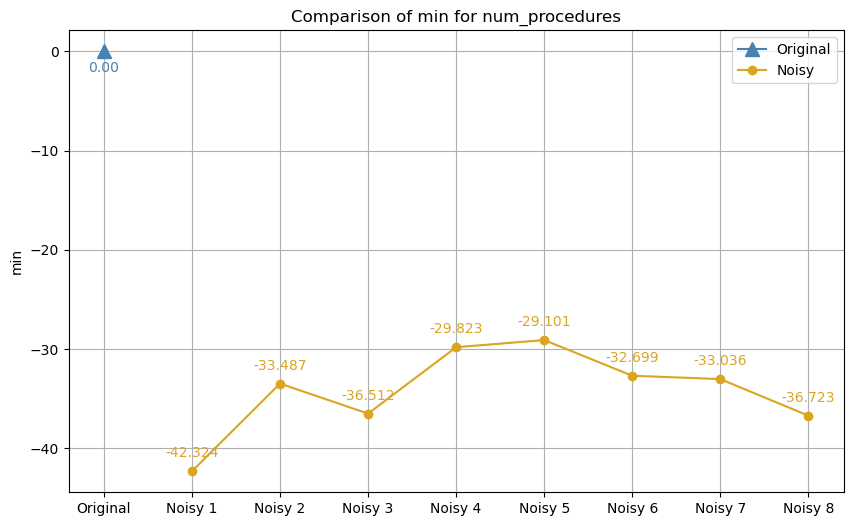

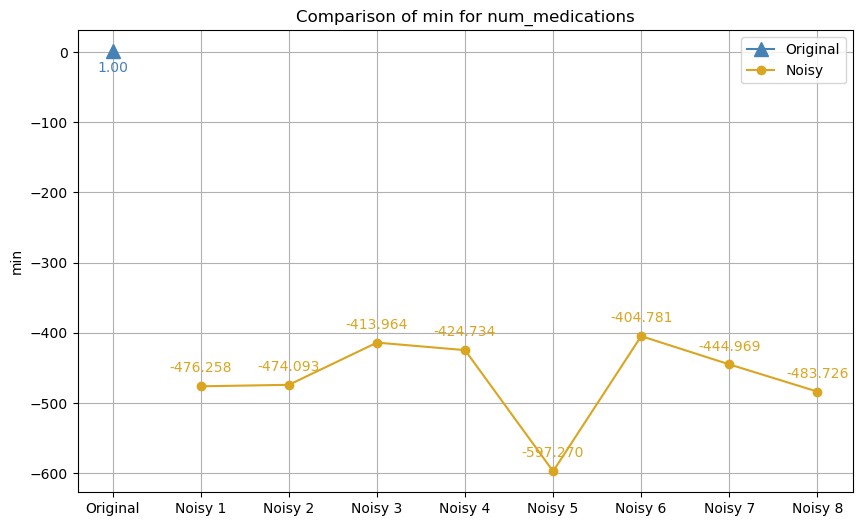

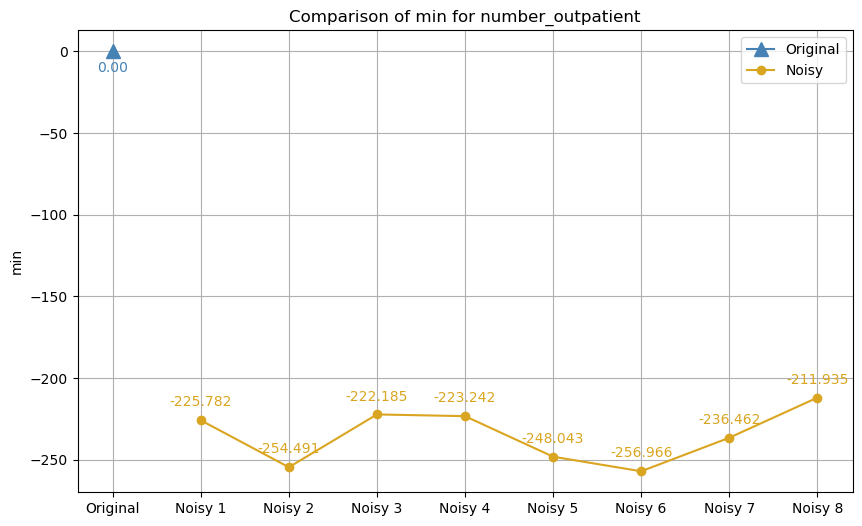

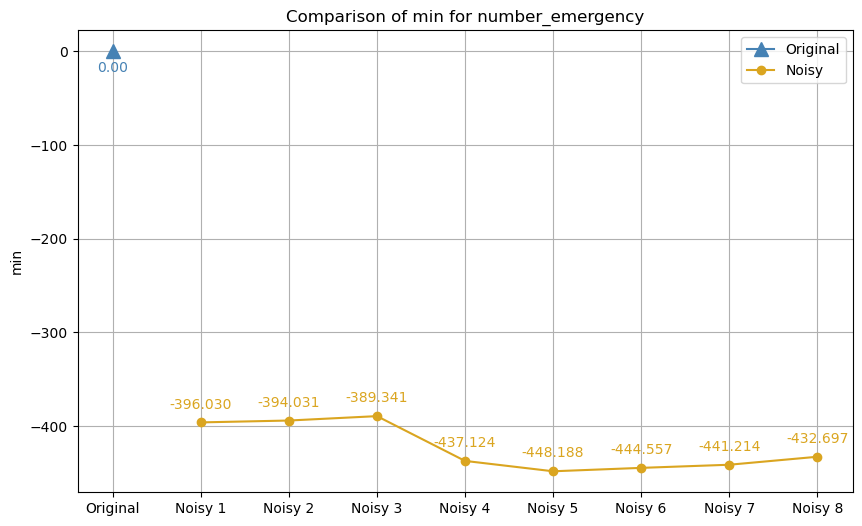

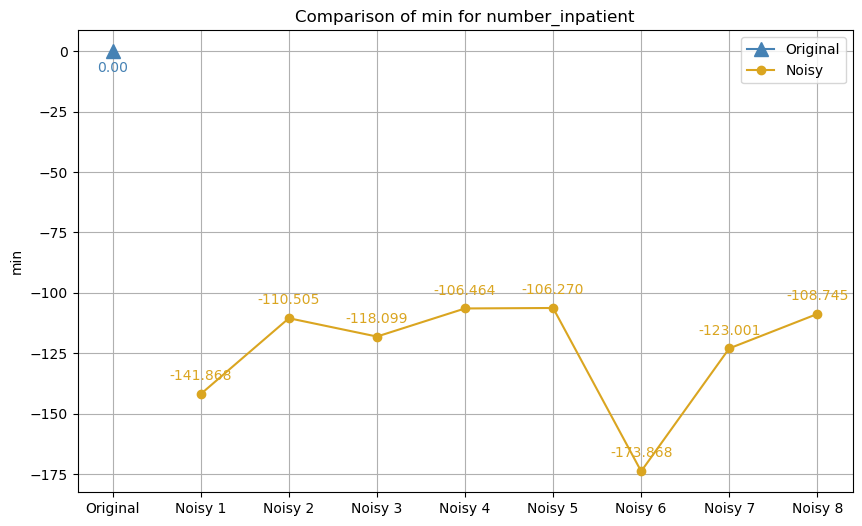

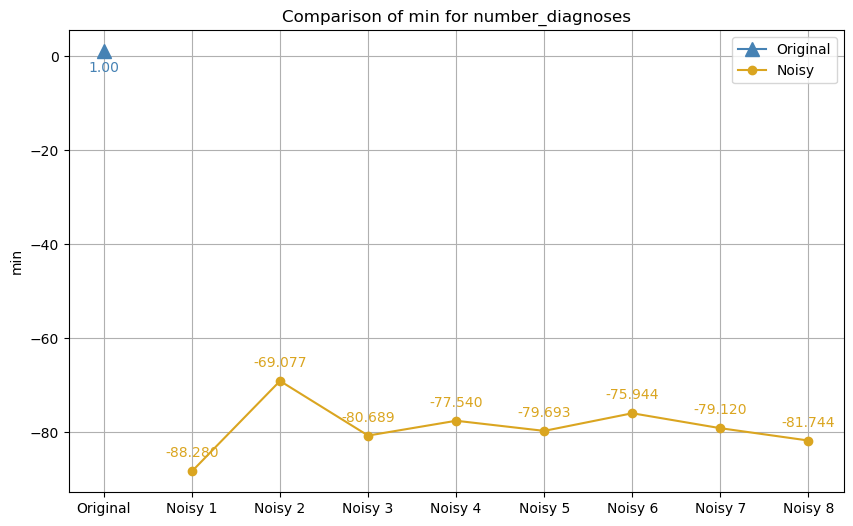

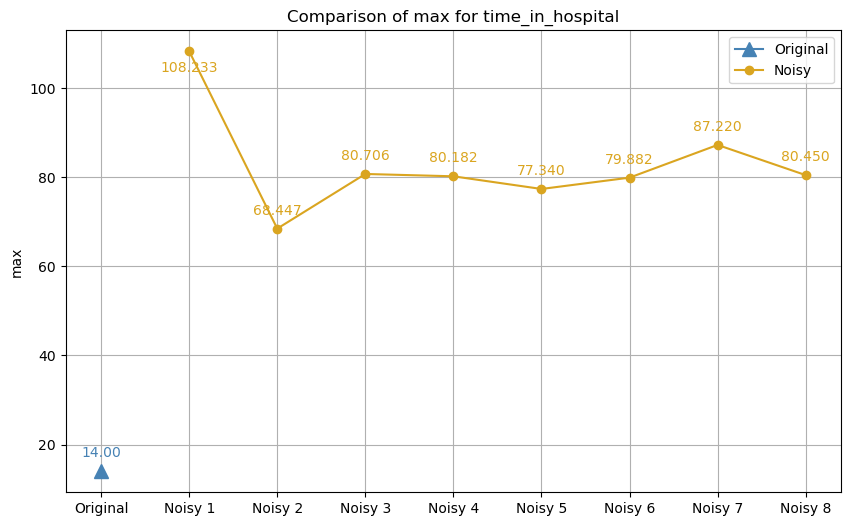

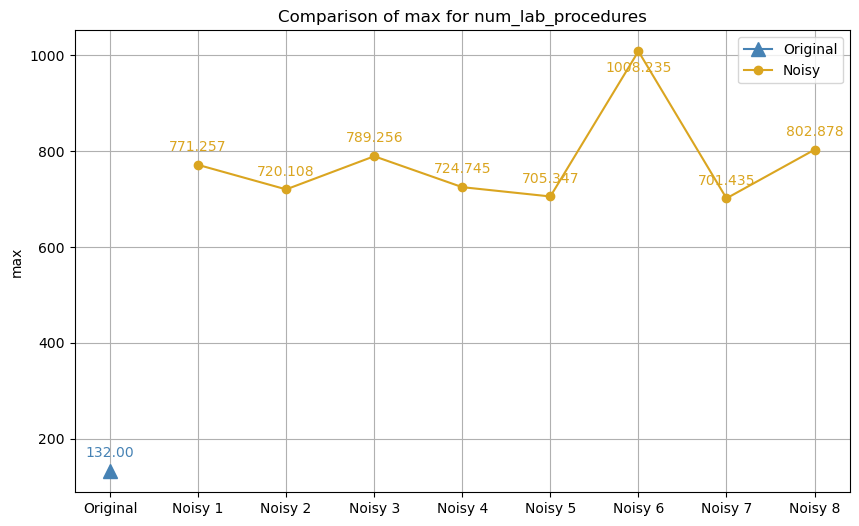

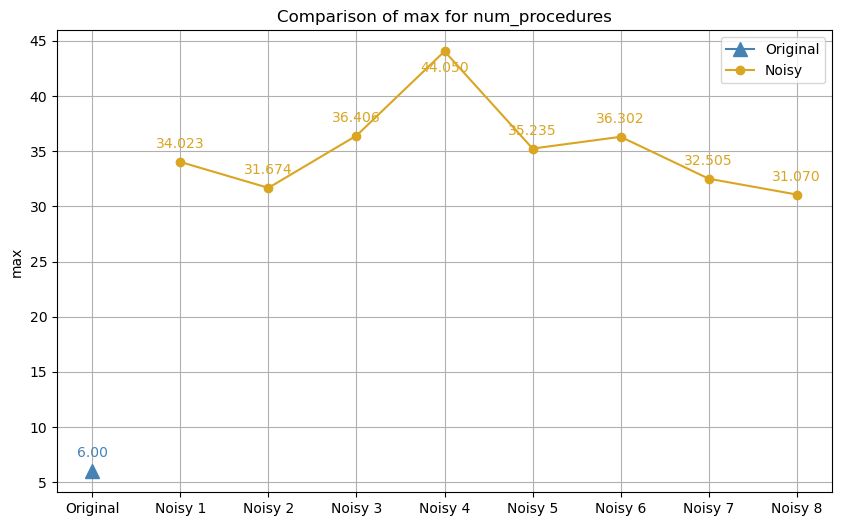

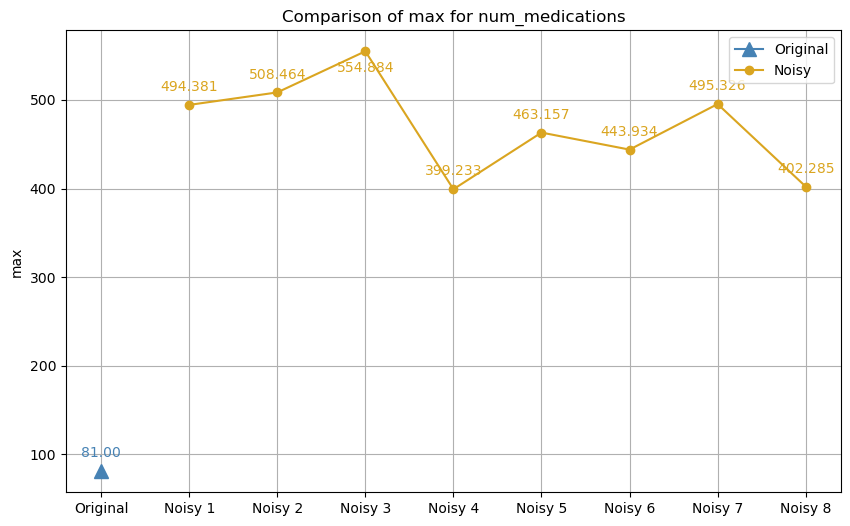

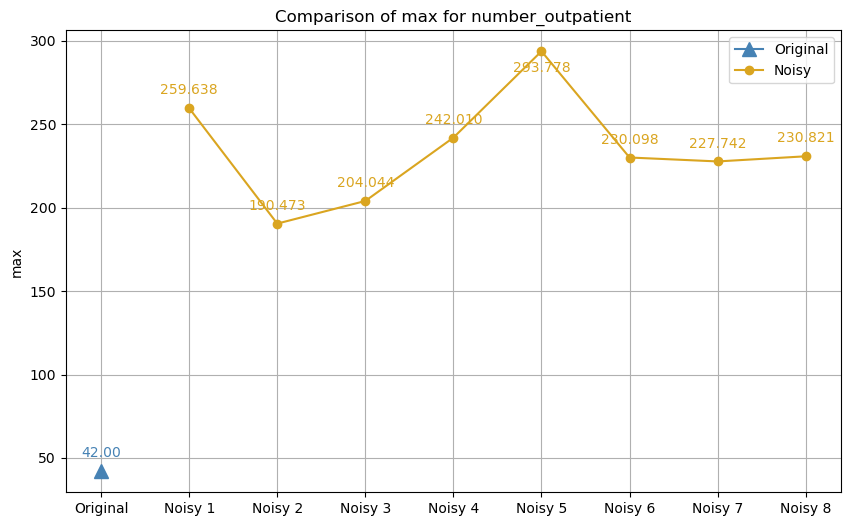

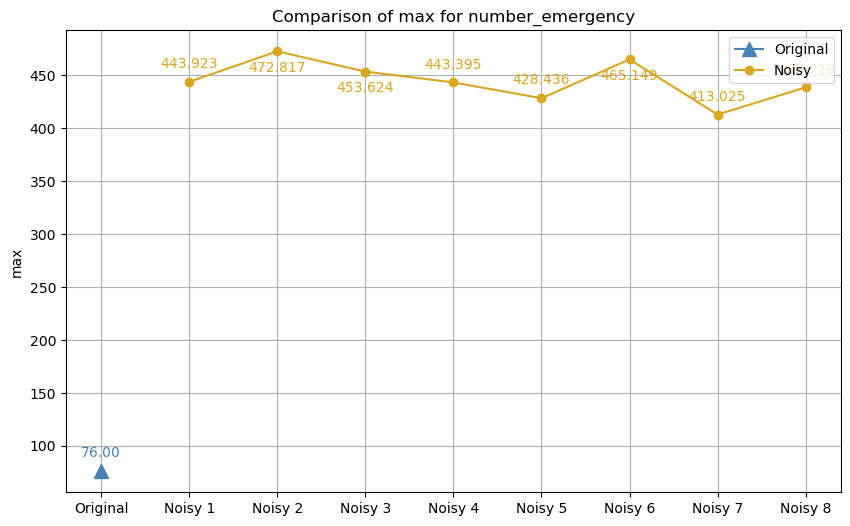

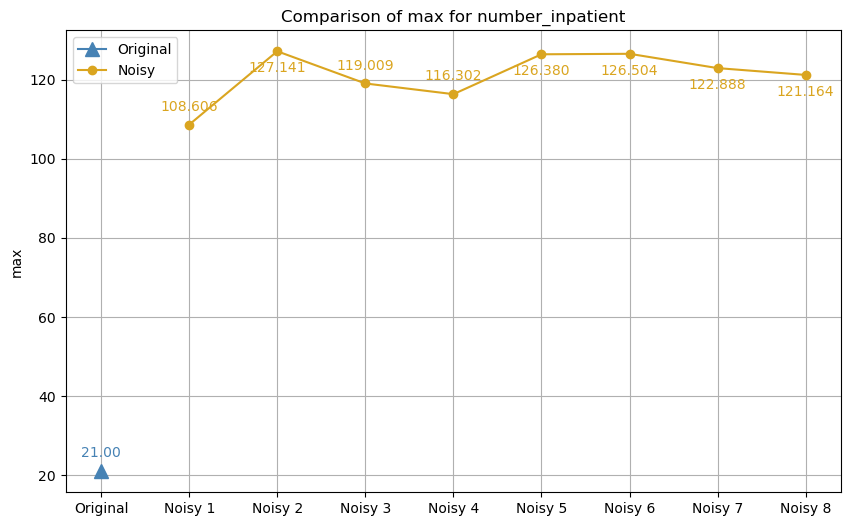

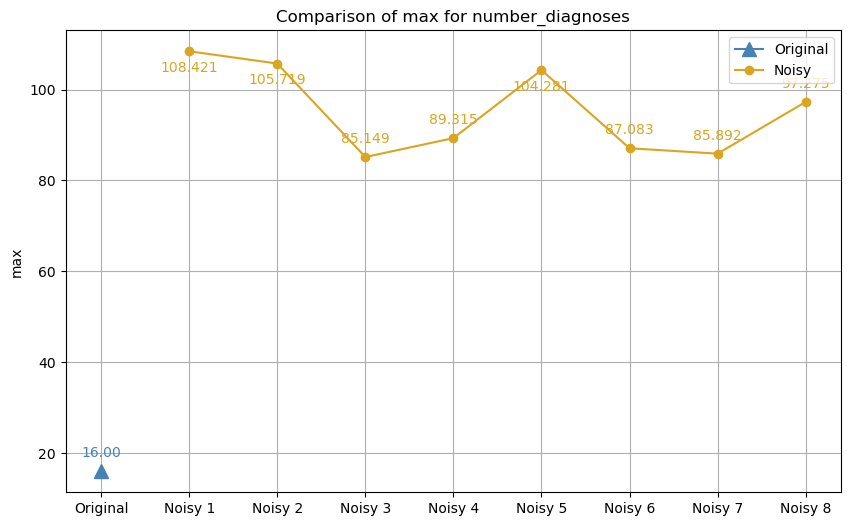

In [91]:
#Comparision for Distributional Measures for Original Data(Numerical Columns) and Noisy Data (Numerical Columns) Part 2:

# Function to calculate distributional measures
def calculate_distributional_measures(df, columns):
    measures = {}
    for col in columns:
        measures[col] = {
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode()[0],
            'range': df[col].max() - df[col].min(),
            'variance': df[col].var(),
            'std_dev': df[col].std(),
            'iqr': df[col].quantile(0.75) - df[col].quantile(0.25),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurt(),
            'min': df[col].min(),
            'max': df[col].max()
        }
    return pd.DataFrame(measures)

# Function to calculate the range of changes
def calculate_range_of_changes(original_measures, noisy_measures_list, numerical_columns):
    range_changes = {col: {} for col in numerical_columns}
    
    for col in numerical_columns:
        for metric in original_measures.index:
            original_value = original_measures[col][metric]
            changes = []
            for noisy_measures in noisy_measures_list:
                noisy_value = noisy_measures[col][metric]
                change = abs(noisy_value - original_value)
                changes.append(change)
            min_change = min(changes)
            max_change = max(changes)
            # Round to 3 digits after decimal
            range_changes[col][metric] = (round(min_change, 3), round(max_change, 3))
    
    return pd.DataFrame(range_changes)

# Visualization
def plot_metric_changes(original_measures, noisy_measures_list, numerical_columns, metric):
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        
        # Plot original value
        original_value = original_measures[col][metric]
        plt.plot(['Original'], [original_value], marker='^', markersize=10, label='Original', color='steelblue')
        
        # Plot noisy values
        noisy_values = [noisy_measures[col][metric] for noisy_measures in noisy_measures_list]
        plt.plot([f'Noisy {i+1}' for i in range(len(noisy_values))], noisy_values, marker='o', linestyle='-', color='goldenrod', label='Noisy')
        
        # Annotate values
        def get_y_offset(value, values_list):
            return 10 if value < max(values_list) * 0.95 else -15

        plt.annotate(f'{original_value:.2f}', ('Original', original_value), textcoords="offset points", xytext=(0,get_y_offset(original_value, noisy_values)), ha='center', color='steelblue')
        for i, val in enumerate(noisy_values):
            plt.annotate(f'{val:.3f}', (f'Noisy {i+1}', val), textcoords="offset points", xytext=(0,get_y_offset(val, noisy_values)), ha='center', color='goldenrod')
        
        # Title and labels
        plt.title(f'Comparison of {metric} for {col}')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        
        # Save plot
         #plt.savefig(f'{col}_{metric}_comparison.png')
        
        # Display plot
        plt.show()

# Assuming df_original, df_noisy1, ..., df_noisy8 are defined and loaded, and numerical_columns is defined
# Calculate measures for the original and noisy dataframes
original_measures = calculate_distributional_measures(df_original, numerical_columns)
noisy_dfs = [df_noisy1, df_noisy2, df_noisy3, df_noisy4, df_noisy5, df_noisy6, df_noisy7, df_noisy8]
noisy_measures_list = [calculate_distributional_measures(df, numerical_columns) for df in noisy_dfs]

# Calculate the range of changes
range_of_changes = calculate_range_of_changes(original_measures, noisy_measures_list, numerical_columns)

# Save the range of changes to a CSV file
#range_of_changes.to_csv('range_of_changes_report.csv')

# Print the range of changes
print("Range of Changes Report:")
print(range_of_changes)

# Plot changes for all numerical columns and all metrics
metrics = ['mean', 'median', 'mode', 'range', 'variance', 'std_dev', 'iqr', 'skewness', 'kurtosis', 'min', 'max']
for metric in metrics:
    plot_metric_changes(original_measures, noisy_measures_list, numerical_columns, metric)


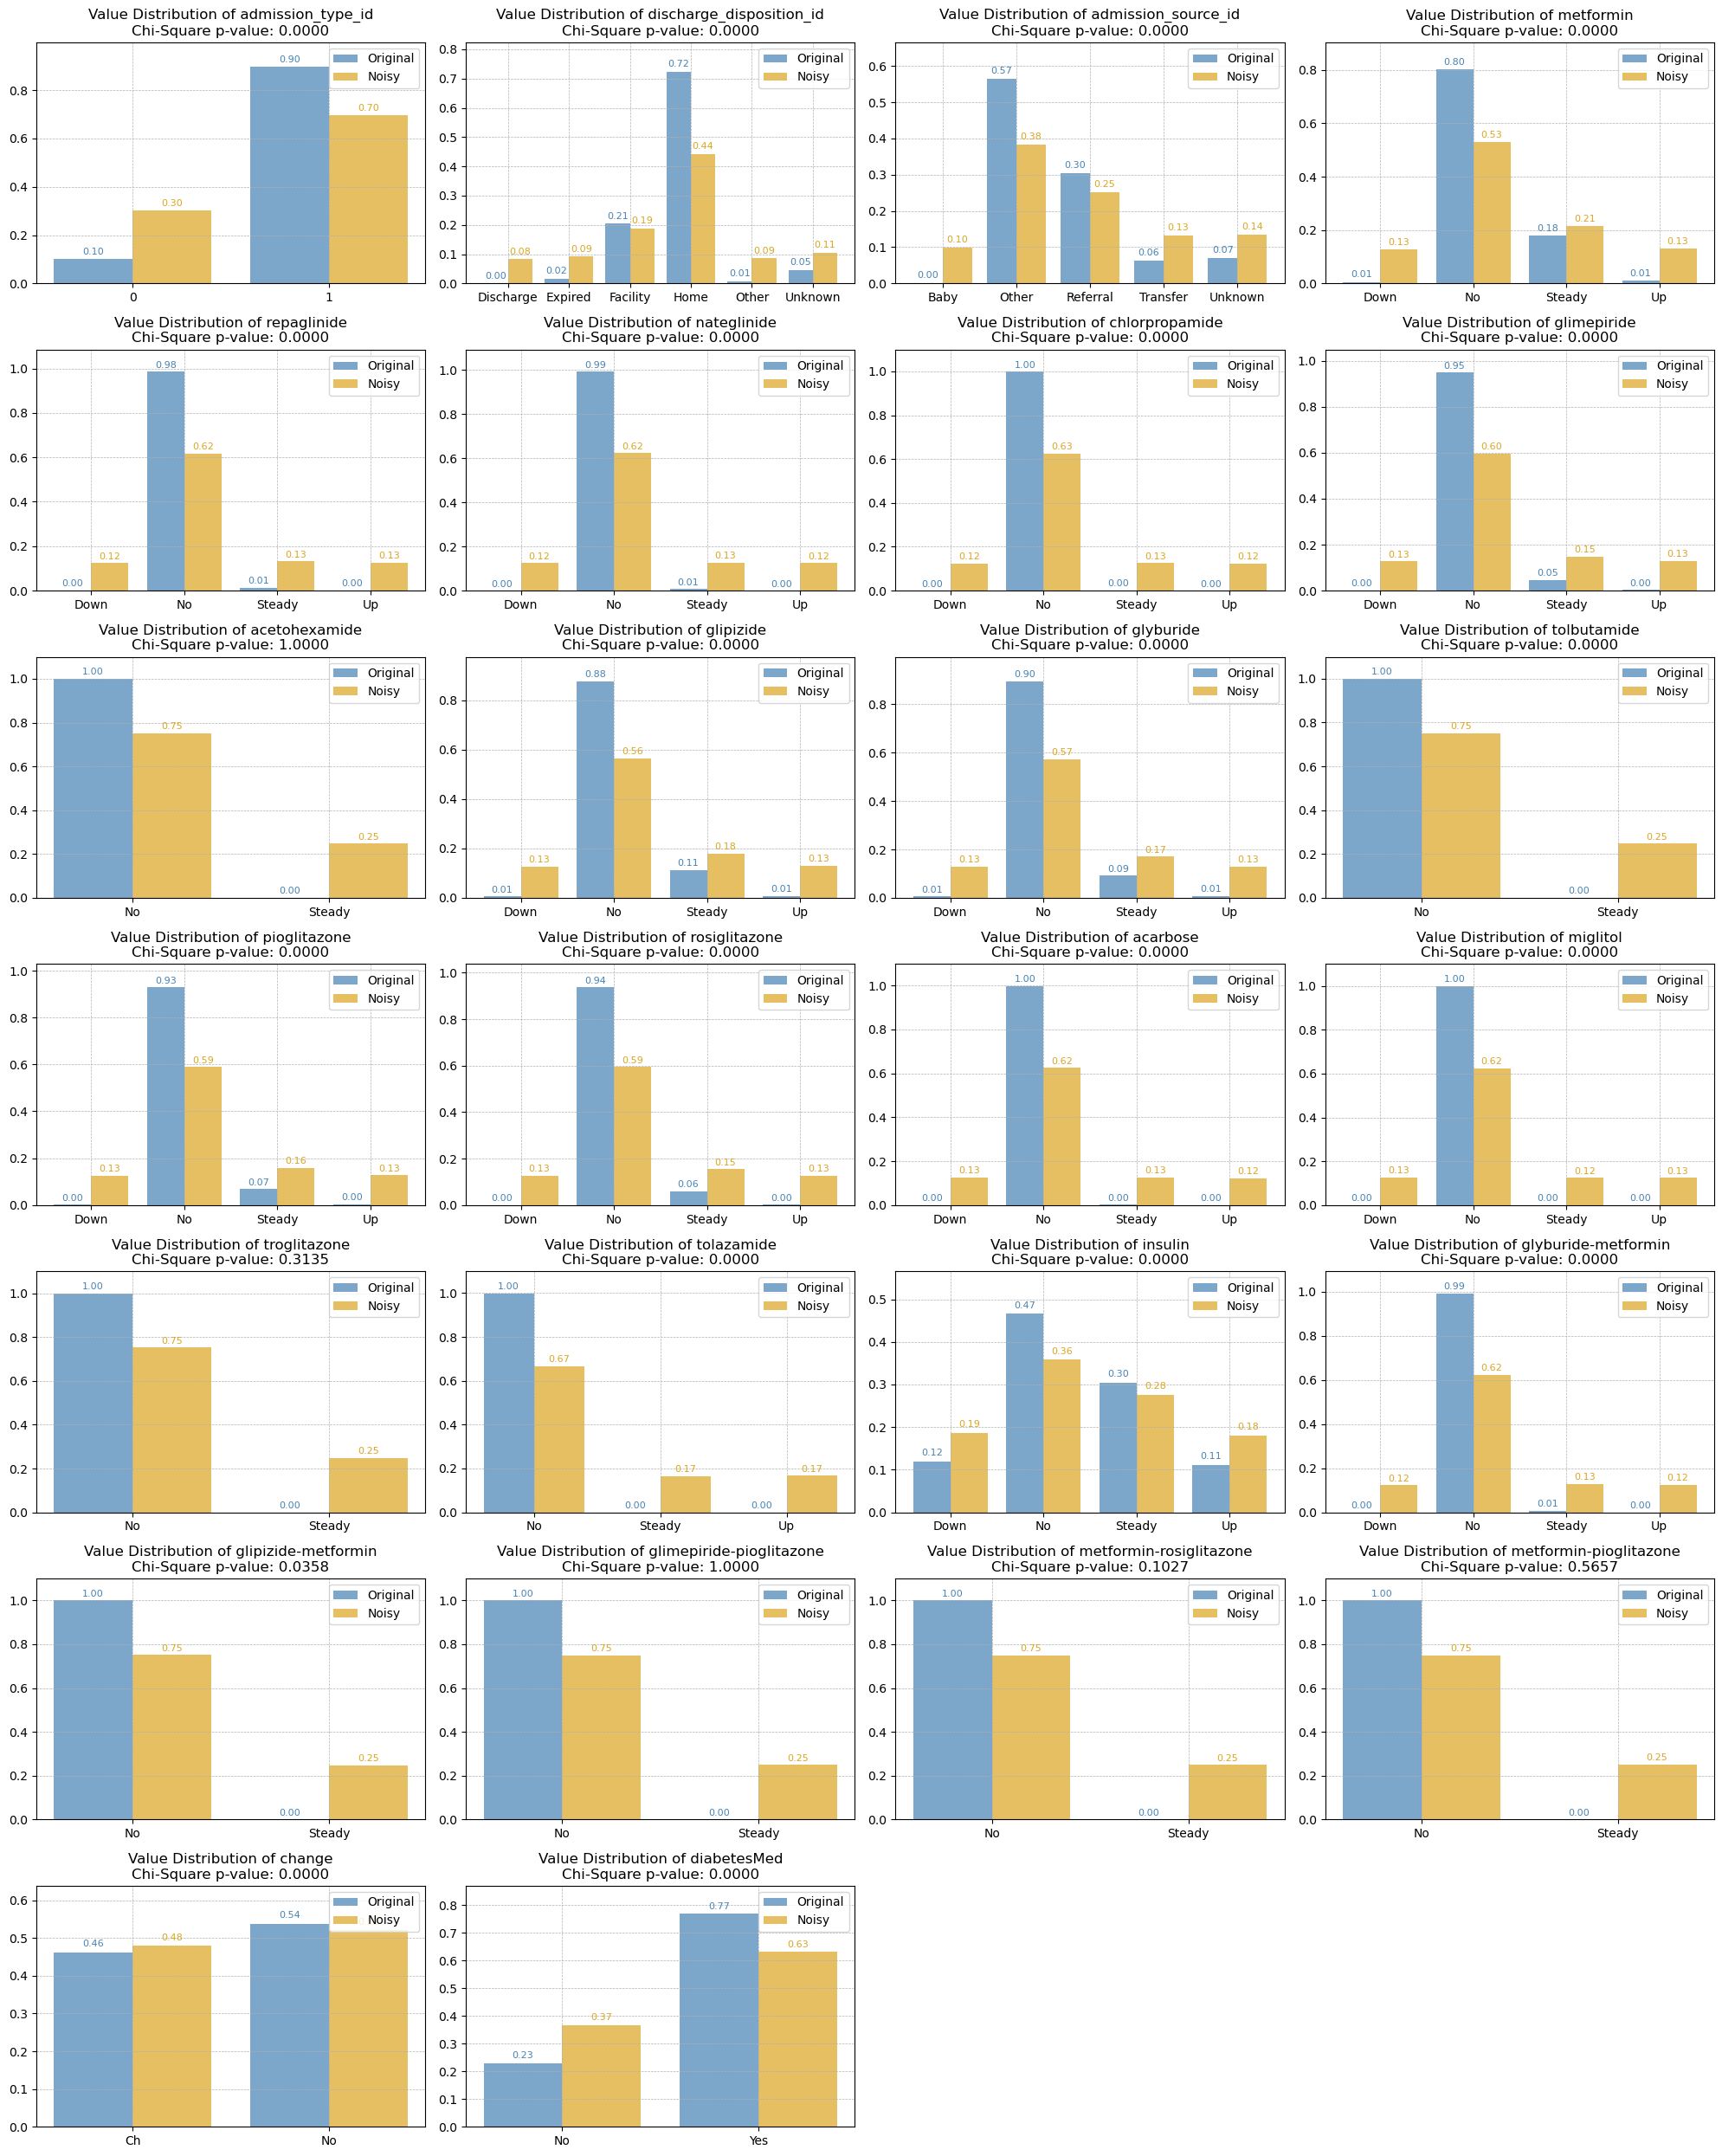

In [86]:
#Comparision for Distributional Measures for Original Data(Numerical Columns) and Noisy Data (Numerical Columns) Part 3:
def compare_value_distributions(df, df_noisy, columns):
    """
    Compare value distributions between original and noisy dataframes for categorical columns.
    
    Parameters:
    - df (pd.DataFrame): Original dataframe.
    - df_noisy (pd.DataFrame): Noisy version of the dataframe.
    - columns (list): List of categorical columns to compare.
    
    Returns:
    - dict: Dictionary containing value distributions and chi-square p-values for each column.
    """
    distributions = {}
    for col in columns:
        original_counts = df[col].value_counts(normalize=True)
        noisy_counts = df_noisy[col].value_counts(normalize=True)
        
        # Chi-Square Test
        chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(df[col], df_noisy[col]))
        
        distributions[col] = {
            'Original': original_counts,
            'Noisy': noisy_counts,
            'Chi-Square p-value': p_val
        }
        
    return distributions

# Example usage:

# Define categorical columns
categorical_columns = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'
]

# Compare value distributions for categorical columns
categorical_distributions = compare_value_distributions(df_original, df_noisy7, categorical_columns)

# Plotting side-by-side grouped bar charts with value labels
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(7, 4, i)
    original_counts = categorical_distributions[col]['Original']
    noisy_counts = categorical_distributions[col]['Noisy']
    
    # Extracting unique categories and aligning their positions
    categories = sorted(set(original_counts.index) | set(noisy_counts.index))
    x = range(len(categories))
    
    # Plotting original and noisy distributions side by side
    bars1 = plt.bar(x, original_counts.reindex(categories), width=0.4, color='steelblue', alpha=0.7, label='Original')
    bars2 = plt.bar([pos + 0.4 for pos in x], noisy_counts.reindex(categories), width=0.4, color='goldenrod', alpha=0.7, label='Noisy')
    
    # Adding category labels
    plt.xticks([pos + 0.2 for pos in x], categories, rotation='horizontal')
    
    # Adding value labels on bars
    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=8, color='steelblue')
    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=8, color='goldenrod')
    
    # Adjusting the y-axis limit to ensure labels are visible
    plt.ylim(0, max(original_counts.max(), noisy_counts.max()) + 0.1)
    
    # Adding title and legend
    plt.title(f'Value Distribution of {col}\nChi-Square p-value: {categorical_distributions[col]["Chi-Square p-value"]:.4f}', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('value_distribution_comparison_df7.png')
plt.show()


In [21]:
#Comparision for Distributional Measures for Original Data(Categorical Columns) and Noisy Data (Categorical Columns) Part 1:
import pandas as pd
from scipy.stats import chi2_contingency

def get_chi_square_p_values(df_original, df_noisy_list, columns):
    """
    Perform chi-square test for each categorical column and return p-values
    comparing the original dataframe with each noisy dataframe.

    Parameters:
    - df_original (pd.DataFrame): Original dataframe.
    - df_noisy_list (list of pd.DataFrame): List of noisy versions of the dataframe.
    - columns (list): List of categorical columns to compare.

    Returns:
    - pd.DataFrame: DataFrame with rows as columns and columns as datasets, 
                   showing Chi-Square p-values for each combination.
    """
    results = []
    
    for i, df_noisy in enumerate(df_noisy_list):
        for col in columns:
            # Create contingency table
            contingency_table = pd.crosstab(df_original[col], df_noisy[col])
            
            # Chi-square test
            _, p_val, _, _ = chi2_contingency(contingency_table)
            
            # Round p-value to 3 decimal places
            p_val_rounded = round(p_val, 3)
            
            # Store result as dictionary
            result = {
                'Dataset': f'Noisy{i+1}',
                'Column': col,
                'Chi-Square p-value': p_val_rounded
            }
            
            results.append(result)
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Pivot table to get desired layout
    pivoted_df = results_df.pivot(index='Column', columns='Dataset', values='Chi-Square p-value')
    
    # Format numeric values to 3 decimal places
    pivoted_df = pivoted_df.round(3)
    
    return pivoted_df



# Assuming you have 8 noisy datasets stored in a list
df_noisy_list = [df_noisy1, df_noisy2, df_noisy3, df_noisy4, df_noisy5, df_noisy6, df_noisy7, df_noisy8]

# Get chi-square test p-values comparing original with each noisy dataset
chi_square_results = get_chi_square_p_values(df_original, df_noisy_list, categorical_columns)

# Display the results
print("Chi-Square Test Results:")
chi_square_results


Chi-Square Test Results:


Dataset                   Noisy1  Noisy2  Noisy3  Noisy4  Noisy5  Noisy6  \
Column                                                                     
acarbose                   0.533   0.447   0.912   0.435   0.404   0.000   
acetohexamide              0.563   0.564   1.000   1.000   1.000   0.561   
admission_source_id        0.000   0.000   0.000   0.000   0.000   0.000   
admission_type_id          0.000   0.000   0.000   0.000   0.000   0.000   
change                     0.002   0.000   0.000   0.001   0.022   0.000   
chlorpropamide             0.380   0.166   0.912   0.998   0.575   0.000   
diabetesMed                0.002   0.272   0.119   0.769   0.036   0.000   
discharge_disposition_id   0.000   0.000   0.000   0.000   0.000   0.000   
glimepiride                0.684   0.531   0.733   0.513   0.690   0.000   
glimepiride-pioglitazone   1.000   1.000   1.000   1.000   1.000   0.561   
glipizide                  0.748   0.478   0.966   0.747   0.481   0.000   
glipizide-metformin        1.000   0.259   0.417   0.885   0.867   0.001   
glyburide                  0.742   0.015   0.497   0.335   0.805   0.000   
glyburide-metformin        0.849   0.802   0.442   0.464   0.946   0.000   
insulin                    0.001   0.000   0.000   0.000   0.000   0.000   
metformin                  0.675   0.292   0.961   0.098   0.298   0.000   
metformin-pioglitazone     1.000   0.563   1.000   1.000   1.000   1.000   
metformin-rosiglitazone    0.997   1.000   1.000   1.000   1.000   0.106   
miglitol                   0.002   0.659   0.415   0.572   0.576   0.000   
nateglinide                0.087   0.682   0.687   0.745   0.773   0.000   
pioglitazone               0.026   0.720   0.764   0.169   0.876   0.000   
repaglinide                0.341   0.380   0.238   0.943   0.737   0.000   
rosiglitazone              0.118   0.463   0.802   0.077   0.939   0.000   
tolazamide                 0.925   0.096   0.181   0.967   0.969   0.000   
tolbutamide                0.870   0.559   0.911   0.300   0.549   0.000   
troglitazone               0.737   0.737   1.000   1.000   0.318   0.318   

Dataset                   Noisy7  Noisy8  
Column                                    
acarbose                   0.000   0.000  
acetohexamide              1.000   1.000  
admission_source_id        0.000   0.000  
admission_type_id          0.000   0.000  
change                     0.000   0.000  
chlorpropamide             0.000   0.000  
diabetesMed                0.000   0.000  
discharge_disposition_id   0.000   0.000  
glimepiride                0.000   0.000  
glimepiride-pioglitazone   1.000   0.564  
glipizide                  0.000   0.000  
glipizide-metformin        0.036   0.007  
glyburide                  0.000   0.000  
glyburide-metformin        0.000   0.000  
insulin                    0.000   0.000  
metformin                  0.000   0.000  
metformin-pioglitazone     0.566   0.565  
metformin-rosiglitazone    0.103   0.994  
miglitol                   0.000   0.000  
nateglinide                0.000   0.000  
pioglitazone               0.000   0.000  
repaglinide                0.000   0.000  
rosiglitazone              0.000   0.000  
tolazamide                 0.000   0.000  
tolbutamide                0.000   0.000  
troglitazone               0.313   0.314

In [22]:
#Comparision for Distributional Measures for Original Data(Categorical Columns) and Noisy Data (Categorical Columns) Part 2:
# Count number of p-values less than 0.05 for each column
num_significant = (chi_square_results < 0.05).sum()
print("\nNumber of p-values < 0.05 in each column:")
num_significant



Number of p-values < 0.05 in each column:


Dataset
Noisy1     8
Noisy2     6
Noisy3     5
Noisy4     5
Noisy5     6
Noisy6    21
Noisy7    21
Noisy8    21
dtype: int64